# Competencia 01

## Creación de la clase ternaria

Definición del target en el dataset de la competencia.

### Dependencies & Setup

In [1]:
# %%bash
# !pip install duckdb
# !pip install jupysql
# !pip install duckdb-engine

In [2]:
import pandas as pd
import duckdb
import os

%load_ext sql
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///:default:

### Directorios

In [3]:
competencia_01 = 'C:/Users/santt/Desktop/DataMining_UBA/2-dm_economia_finanzas/competencia_01'

datos = os.path.join(competencia_01,'datos')

datos_crudos = os.path.join(datos,'competencia_01_crudo.csv')

### Uso de SQL con funciones analíticas

In [4]:
datos_crudos

'C:/Users/santt/Desktop/DataMining_UBA/2-dm_economia_finanzas/competencia_01\\datos\\competencia_01_crudo.csv'

In [5]:
%%sql
create or replace table competencia_01_crudo as
select
    *
from read_csv_auto("C:/Users/santt/Desktop/DataMining_UBA/2-dm_economia_finanzas/competencia_01/datos/competencia_01_crudo.csv")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,Success


In [6]:
# %%sql ## cambio el condicional según meme brandoni
# create or replace table competencia_01 as
# with periodos as (
#     select distinct foto_mes from competencia_01_crudo
# ), clientes as (
#     select distinct numero_de_cliente from competencia_01_crudo
# ), todo as (
#     select numero_de_cliente, foto_mes from clientes cross join periodos
# ), clase_ternaria as (
#     select
#         c.*
#         , if(c.numero_de_cliente is null, 0, 1) as mes_0
#         , lead(mes_0, 1) over (partition by t.numero_de_cliente order by foto_mes) as mes_1
#         , lead(mes_0, 2) over (partition by t.numero_de_cliente order by foto_mes) as mes_2
#         , if(mes_2 = 1, 'CONTINUA', 
#             if( mes_1 = 1, 'BAJA+2', 'BAJA+1')) as clase_ternaria
#     from todo t
#     left join competencia_01_crudo c using (numero_de_cliente, foto_mes)
# ) select
#   * EXCLUDE (mes_0, mes_1, mes_2)
# from clase_ternaria
# where mes_0 = 1

In [7]:
## cambio el condicional según meme brandoni

In [8]:
%%sql 
create or replace table competencia_01 as
with periodos as (
    select distinct foto_mes from competencia_01_crudo
), clientes as (
    select distinct numero_de_cliente from competencia_01_crudo
), todo as (
    select numero_de_cliente, foto_mes from clientes cross join periodos
), clase_ternaria as (
    select
        c.*
        , if(c.numero_de_cliente is null, 0, 1) as mes_0
        , lead(mes_0, 1) over (partition by t.numero_de_cliente order by foto_mes) as mes_1
        , lead(mes_0, 2) over (partition by t.numero_de_cliente order by foto_mes) as mes_2
        , if(mes_2 = 1, 'CONTINUA', 
            if( mes_1 = 0, 'BAJA+1',
                if(mes_2=0, 'BAJA+2', null))) as clase_ternaria
    from todo t
    left join competencia_01_crudo c using (numero_de_cliente, foto_mes)
) select
  * EXCLUDE (mes_0, mes_1, mes_2)
from clase_ternaria
where mes_0 = 1

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,Success


Imprimo toda la tabla

In [9]:
%sql select * from competencia_01

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria
0,249239632,202101,1,0,0,52,263,12.90,-1020.41,951.02,...,4.0,0.0,-57325.80,0.0,5785.0,13134.60,7.0,0.0,2744.82,CONTINUA
1,249239632,202102,1,0,0,52,264,849.59,617.02,1862.72,...,-3.0,0.0,-28492.69,0.0,5813.0,16111.71,9.0,0.0,3448.62,CONTINUA
2,249239632,202103,1,0,0,52,265,1954.04,3460.90,898.96,...,1.0,0.0,-35025.01,0.0,5844.0,11427.81,5.0,0.0,3131.91,CONTINUA
3,249239632,202104,1,0,0,52,266,2610.89,7231.49,1619.99,...,2.0,0.0,-29334.20,0.0,5874.0,18525.47,8.0,0.0,3835.71,CONTINUA
4,249239632,202105,1,0,0,52,267,2963.71,10969.09,1121.34,...,5.0,0.0,-37566.22,0.0,5905.0,10756.25,4.0,0.0,3624.57,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981941,1595193701,202105,0,0,0,51,1,0.00,0.00,0.00,...,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,0.00,NaN
981942,1595193701,202106,1,0,0,51,2,1176.95,1176.95,980.82,...,0.0,0.0,NaN,NaN,31.0,NaN,NaN,NaN,0.00,NaN
981943,1598206246,202106,1,0,0,31,1,9.09,9.09,0.00,...,0.0,0.0,NaN,NaN,7.0,NaN,NaN,NaN,0.00,NaN
981944,1598444941,202106,0,0,0,27,1,0.00,0.00,0.00,...,NaN,0.0,NaN,NaN,15.0,NaN,NaN,NaN,0.00,NaN


Revisión de caso

In [10]:
%%sql
select
    numero_de_cliente
    , foto_mes
from competencia_01
where numero_de_cliente = 304051318
order by foto_mes

,numero_de_cliente,foto_mes
0,304051318,202101
1,304051318,202102
2,304051318,202104
3,304051318,202105
4,304051318,202106


Este caso se dio de baja en 202103 y luego retomó

In [11]:
%%sql 
select numero_de_cliente, foto_mes, clase_ternaria 
from competencia_01
where numero_de_cliente = 304051318

,numero_de_cliente,foto_mes,clase_ternaria
0,304051318,202101,BAJA+2
1,304051318,202102,CONTINUA
2,304051318,202104,CONTINUA
3,304051318,202105,NaN
4,304051318,202106,NaN


Guardo la tabla

In [12]:
%%sql 
COPY competencia_01 TO 'competencia_01_brandoni.csv' (FORMAT CSV, HEADER)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,Success


## EDA

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Variables de partida

In [10]:
dataset_file = 'competencia_01.csv'

ganancia_acierto = 273000
costo_estimulo = 7000

### Datos presentes e históricos

Tenemos que trabajar con datos 202104, para contar con un target a +2 meses

In [11]:
data = pd.read_csv(dataset_file)

# presente
data_pres = data[data['foto_mes'] == 202104]

# histórico
data_hist = data[data['foto_mes'] < 202104]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981946 entries, 0 to 981945
Columns: 155 entries, numero_de_cliente to clase_ternaria
dtypes: float64(89), int64(65), object(1)
memory usage: 1.1+ GB


### Modelos naive basados en árboles

Para captar relevancia de las variables disponibles originalmente

In [13]:
# por ahora uso datos presentes unicamente

X = data_pres.drop('clase_ternaria', axis=1)
y = data_pres['clase_ternaria']

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Entrenamiento del modelo de Decision Tree
model_dt = DecisionTreeClassifier(criterion='gini',
                                  random_state=17,
                                  min_samples_split=80,
                                  min_samples_leaf=1,
                                  max_depth=10)

model_dt.fit(X, y)

# Importancia de características con Decision Tree
feature_importances_dt = pd.DataFrame({'feature': X.columns, 'importance': model_dt.feature_importances_})
feature_importances_dt.sort_values('importance', ascending=False, inplace=True)

# Entrenamiento del modelo de Random Forest
model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=17)

model_rf.fit(X, y)

# Importancia de características con Random Forest
feature_importances_rf = pd.DataFrame({'feature': X.columns, 'importance': model_rf.feature_importances_})
feature_importances_rf.sort_values('importance', ascending=False, inplace=True)

# Seleccionar las 20 características más importantes en ambos modelos
top_features_dt = feature_importances_dt.head(20)
top_features_rf = feature_importances_rf.head(20)

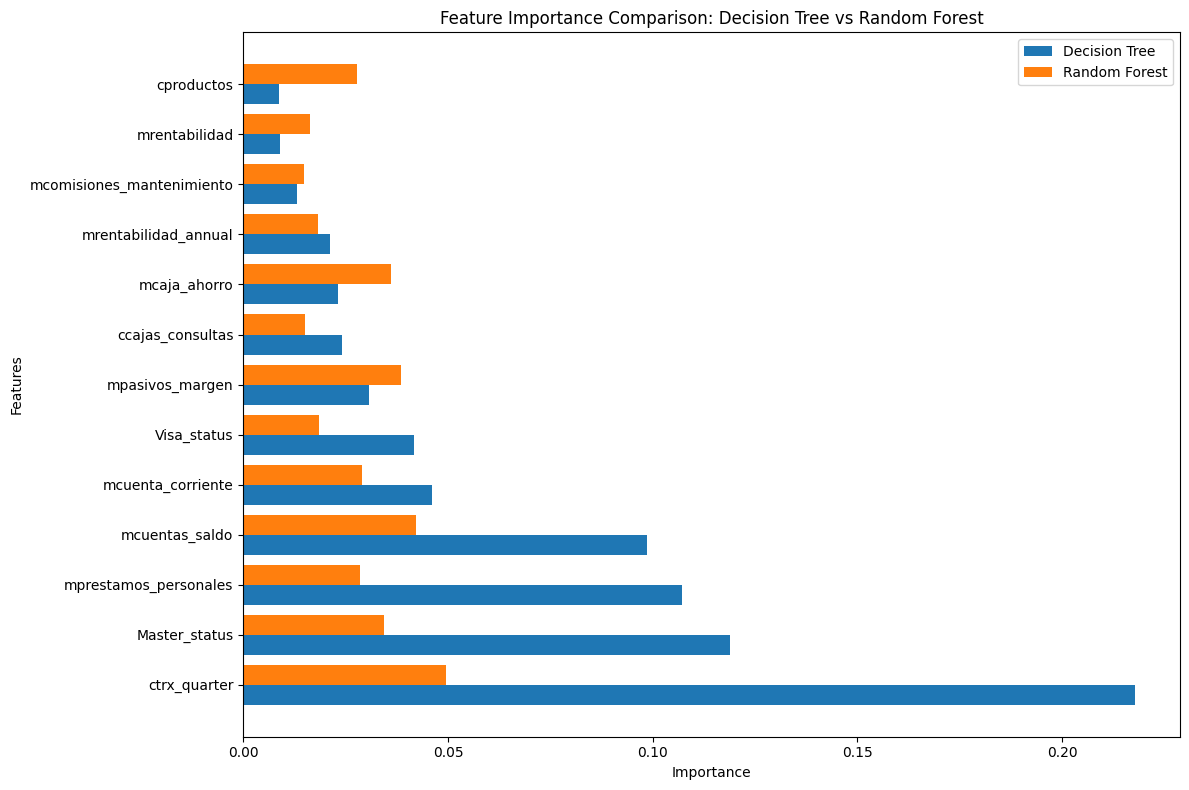

In [15]:
# Combinar los resultados en un solo DataFrame para facilitar la comparación
comparison_df = pd.merge(top_features_dt, top_features_rf, on='feature', suffixes=('_dt', '_rf'))

# Gráfico de barras doble con ejes invertidos
plt.figure(figsize=(12, 8))
bar_width = 0.4
index = np.arange(len(comparison_df))

plt.barh(index, comparison_df['importance_dt'], bar_width, label='Decision Tree')
plt.barh(index + bar_width, comparison_df['importance_rf'], bar_width, label='Random Forest')

plt.ylabel('Features')
plt.xlabel('Importance')
plt.title('Feature Importance Comparison: Decision Tree vs Random Forest')
plt.yticks(index + bar_width / 2, comparison_df['feature'])
plt.legend()

plt.tight_layout()
plt.show()

Diferencias de la relevancia encontrada entre los modelos

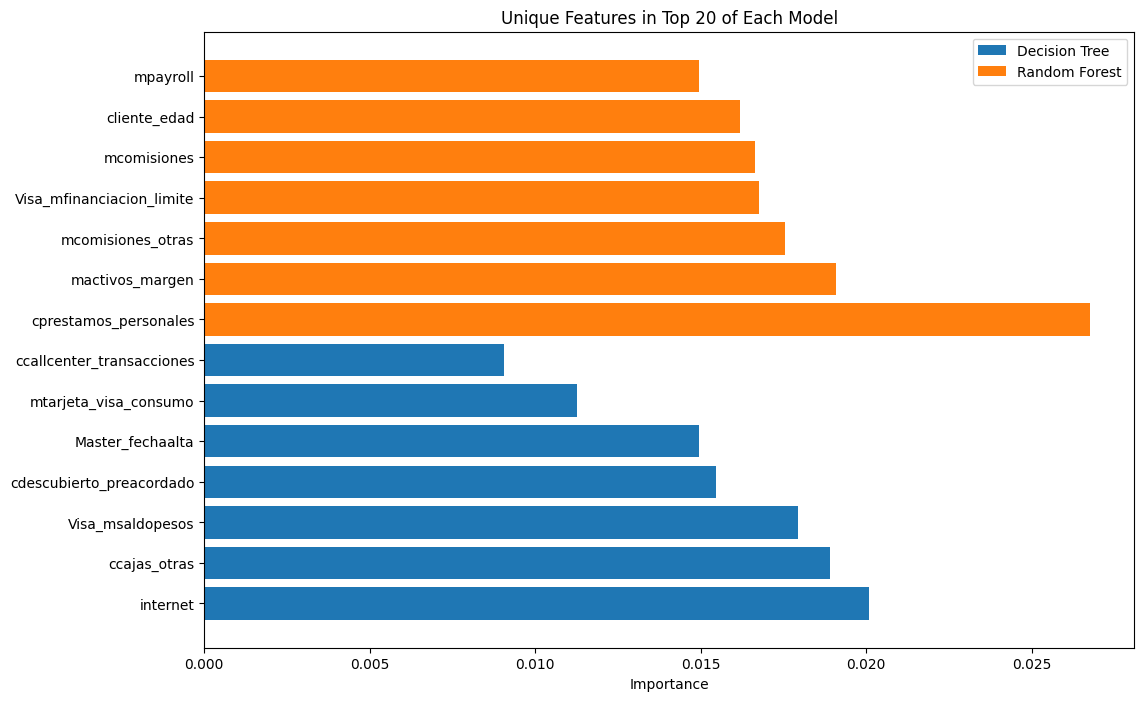

In [16]:
# Variables en el top 20 del Decision Tree
top_features_dt_set = set(top_features_dt['feature'])

# Variables en el top 20 del Random Forest
top_features_rf_set = set(top_features_rf['feature'])

# Variables en el top 20 del Decision Tree pero no en el Random Forest
only_in_dt = top_features_dt_set - top_features_rf_set

# Variables en el top 20 del Random Forest pero no en el Decision Tree
only_in_rf = top_features_rf_set - top_features_dt_set

# Crear DataFrames con las diferencias
only_in_dt_df = feature_importances_dt[feature_importances_dt['feature'].isin(only_in_dt)]
only_in_rf_df = feature_importances_rf[feature_importances_rf['feature'].isin(only_in_rf)]

# Combinando las diferencias en un solo DataFrame
combined_df = pd.concat([
    only_in_dt_df.assign(model='Decision Tree'),
    only_in_rf_df.assign(model='Random Forest')
])

# Gráfico combinado de barras
plt.figure(figsize=(12, 8))

# Graficar las barras, con color por modelo
for model in combined_df['model'].unique():
    subset = combined_df[combined_df['model'] == model]
    plt.barh(subset['feature'], subset['importance'], label=model)

# Configuraciones del gráfico
plt.xlabel('Importance')
plt.title('Unique Features in Top 20 of Each Model')
plt.legend()
# plt.grid(True)
plt.show()

In [24]:
only_in_dt_df

,feature,importance
4,internet,0.020079
102,ccajas_otras,0.018897
138,Visa_msaldopesos,0.017936
21,cdescubierto_preacordado,0.015450
127,Master_fechaalta,0.014944
28,mtarjeta_visa_consumo,0.011250
95,ccallcenter_transacciones,0.009052


In [25]:
only_in_dt_df.importance.sum()

0.10760868902874278

In [26]:
only_in_rf_df.importance.sum()

0.12792926994477702

Los modelos muestran una discrepancia del orden del 10 ~ 12 % de la relevancia de las variables, optando, en el top 20 por 7 variables distintas.

El tratarse de un modelo simple vs. un modelo de ensamble con bagging, entiendo que lo arrojado por RandomForest es más fiable.

### EDA continuación

In [53]:
import seaborn as sns

# 1. Selección de las 20 Variables Principales
def select_top_features(data, top_features):
    return data[top_features]

# 2. Resumen Estadístico de las Variables Seleccionadas
def summary_statistics(data):
    return data.describe().T.to_markdown()

# 3. Distribución de Variables Numéricas
# def is_discrete(data, feature):
#     """Determine if a numeric feature is discrete based on unique values."""
#     unique_values = data[feature].nunique()
#     total_values = len(data[feature])
#     return unique_values <= 0.1 * total_values

def is_int(data, feature):
    if pd.api.types.is_numeric_dtype(data[feature]):
        if pd.api.types.is_integer_dtype(data[feature]):
            return True
        else:
            return False

def plot_distributions(data, num_features, target, title_suffix='', sample_frac=0.2, transform='log1p'):
    """Plot distributions of numerical features, determining if they are discrete or continuous,
    and sample the dataset to speed up the process. Apply appropriate transformation to continuous variables."""
    
    # Sample 20% of the data by default for faster plotting
    data_sampled = data.sample(frac=sample_frac, random_state=42)
    
    for feature in num_features:
        plt.figure(figsize=(10, 4))

        # Determine if the feature is discrete or continuous
        if is_int(data_sampled, feature):
            sns.countplot(x=data_sampled[feature], hue=data_sampled[target])
            plt.title(f'Count Plot of {feature} {title_suffix}')
        else:
            # Handle NaN and negative values before applying log1p
            if transform == 'log1p':
                positive_values = data_sampled[feature] > 0
                transformed_feature = np.log1p(data_sampled[feature].where(positive_values))
                title = f'Log1p-Transformed Distribution of {feature} {title_suffix}'
            elif transform == 'sqrt':
                non_negative_values = data_sampled[feature] - data_sampled[feature].min() + 1
                transformed_feature = np.sqrt(non_negative_values)
                title = f'Square Root Transformed Distribution of {feature} {title_suffix}'
            else:
                transformed_feature = data_sampled[feature]
                title = f'Distribution of {feature} {title_suffix}'

            # Create a DataFrame to include both the transformed feature and the target variable
            df_transformed = pd.DataFrame({feature: transformed_feature, target: data_sampled[target]})
            sns.histplot(data=df_transformed, x=feature, hue=target, kde=True, element='step', stat="density", common_norm=False)
            plt.title(title)
        
        plt.show()

# 4. Matriz de Correlación
def plot_correlation_matrix(data, target=None, title_suffix=''):
    # Encode the target variable if provided
    if target:
        data[target] = data[target].map({"CONTINUA": 0, "BAJA+1": 1, "BAJA+2": 2}).astype(float)
        numeric_data = data.select_dtypes(include=[np.number])
    else:
        numeric_data = data.select_dtypes(include=[np.number])
    
    # Compute the correlation matrix
    corr_matrix = numeric_data.corr()
    
    # Plot the correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title(f'Correlation Matrix {title_suffix}')
    plt.show()

# 5. Análisis de Valores Nulos
def missing_values_analysis(data):
    missing_values = data.isnull().mean() * 100
    return missing_values[missing_values > 0].sort_values(ascending=False)

# 6. Boxplots para Identificación de Outliers
def plot_boxplots(data, num_features, title_suffix='', ex_cut=0.02):
    """Plot boxplots of numerical features with extreme 2% cuts to identify outliers."""
    for feature in num_features:
        plt.figure(figsize=(10, 4))

        # Apply the 5% cuts to filter out extreme values
        lower_bound = data[feature].quantile(ex_cut)
        upper_bound = data[feature].quantile(1-ex_cut)
        filtered_data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
        
        # Plot the boxplot
        sns.boxplot(x=filtered_data[feature])
        plt.title(f'Boxplot of {feature} {title_suffix}')
        plt.show()

# 7. Relación entre Variables Numéricas y la Variable Objetivo
def plot_feature_target_relationship(data, num_features, target, title_suffix='', sample_frac=0.2):
    # Make a copy of the DataFrame to avoid modifying the original
    data = data.copy()

    # Encode the target variable using .loc[] to avoid SettingWithCopyWarning
    data.loc[:, target] = data[target].map({"CONTINUA": 0, "BAJA+1": 1, "BAJA+2": 2})

    # Drop rows where the target encoding might have failed (e.g., missing values)
    data.dropna(subset=[target], inplace=True)
    
    # Sample 20% of the data by default for faster plotting
    data_sampled = data.sample(frac=sample_frac, random_state=42)
    
    # Combine the selected features and the target into a single DataFrame
    plot_data = data_sampled[num_features + [target]]
    
    # Ensure that all columns are numeric for the pairplot
    plot_data = plot_data.apply(pd.to_numeric, errors='coerce')

    # Drop any remaining rows with NaN values
    plot_data.dropna(inplace=True)
    
    # Create the pairplot, coloring by the target variable
    pairplot = sns.pairplot(plot_data, hue=target, palette='coolwarm', diag_kind='kde', markers=["o", "s", "D"])
    
    # Adjust the layout and add a title
    pairplot.figure.suptitle(f'Pairplot of Features Colored by {target} {title_suffix}', y=1.02)
    plt.show()

# 8. Distribución de la Variable Objetivo
def plot_target_distribution(data, target, title_suffix=''):
    # Encode the target variable
    # target_encoded = data[target].map({"CONTINUA": 0, "BAJA+1": 1, "BAJA+2": 2})
    
    plt.figure(figsize=(8, 4))
    sns.countplot(x=data[target])
    plt.title(f'Distribution of {target} {title_suffix}')
    plt.show()

# 9. Comparación de Variables Numéricas por Clase de la Variable Objetivo
def plot_violin_by_target(data, num_features, target, title_suffix='', ex_cut=0.02):
    """Plot violin plots of numerical features by the target variable with extreme 2% cuts."""
    for feature in num_features:
        plt.figure(figsize=(10, 4))
        
        # Apply the 5% cuts to filter out extreme values
        lower_bound = data[feature].quantile(ex_cut)
        upper_bound = data[feature].quantile(1-ex_cut)
        filtered_data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
        
        # Plot the violin plot
        sns.violinplot(x=filtered_data[target], y=filtered_data[feature])
        plt.title(f'{feature} distribution by {target} {title_suffix}')
        plt.show()

# 10. Análisis de Variables Categóricas
def analyze_categorical_features(data, cat_features, title_suffix=''):
    for feature in cat_features:
        plt.figure(figsize=(10, 4))
        sns.countplot(data[feature])
        plt.title(f'Count plot of {feature} {title_suffix}')
        plt.show()

In [18]:
top_features_rf

,feature,importance
107,ctrx_quarter,0.049629
22,mcuentas_saldo,0.042169
11,mpasivos_margen,0.038610
18,mcaja_ahorro,0.036005
111,Master_status,0.034386
16,mcuenta_corriente,0.028943
33,mprestamos_personales,0.028472
12,cproductos,0.027751
32,cprestamos_personales,0.026758
10,mactivos_margen,0.019080


Summary Statistics - 202104 Data
|                       |   count |           mean |              std |               min |       25% |      50% |       75% |              max |
|:----------------------|--------:|---------------:|-----------------:|------------------:|----------:|---------:|----------:|-----------------:|
| ctrx_quarter          |  164090 |    119.039     |     88.7478      |       0           |    59     |   105    |    158    |   2314           |
| mcuentas_saldo        |  164090 | 213553         |      1.14641e+06 |      -1.39314e+06 |   541.338 | 33575.2  | 144184    |      1.12517e+08 |
| mpasivos_margen       |  164090 |   1652.12      |   8137.31        |  -38073.9         |   232.59  |   653.49 |   1554.25 |      2.41434e+06 |
| mcaja_ahorro          |  164090 |  79447.7       | 286369           |  -15048.5         |  5287.29  | 22366.7  |  66907.3  |      3.66379e+07 |
| Master_status         |  147219 |      0.0315652 |      0.499183    |       0           |

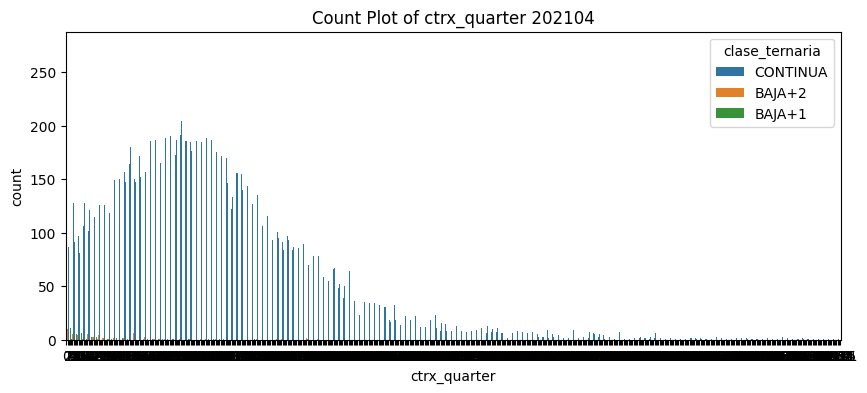

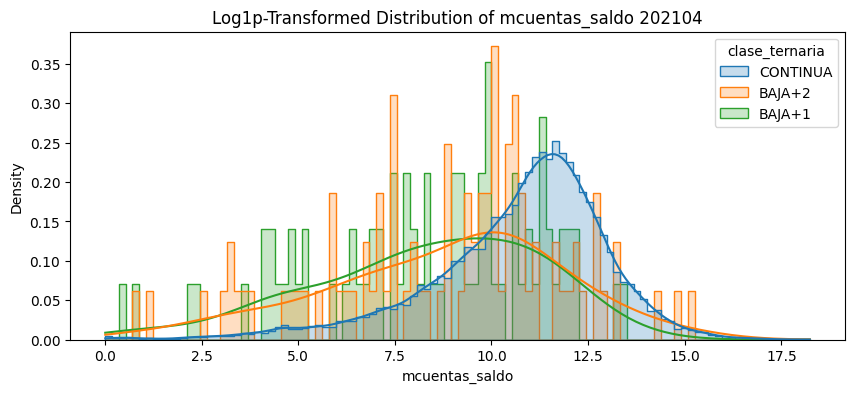

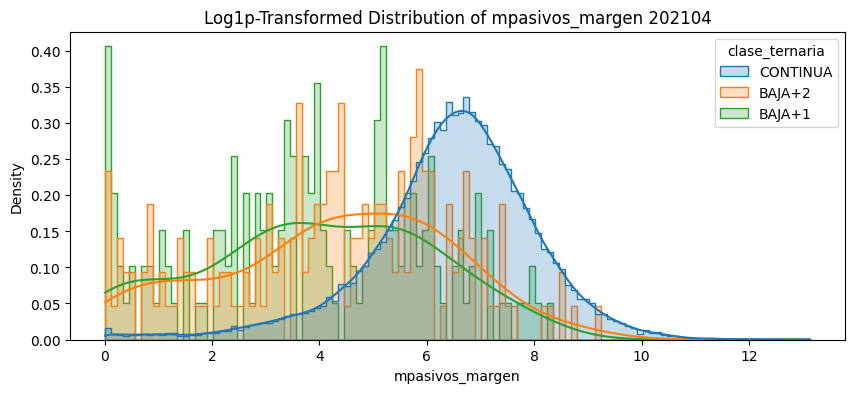

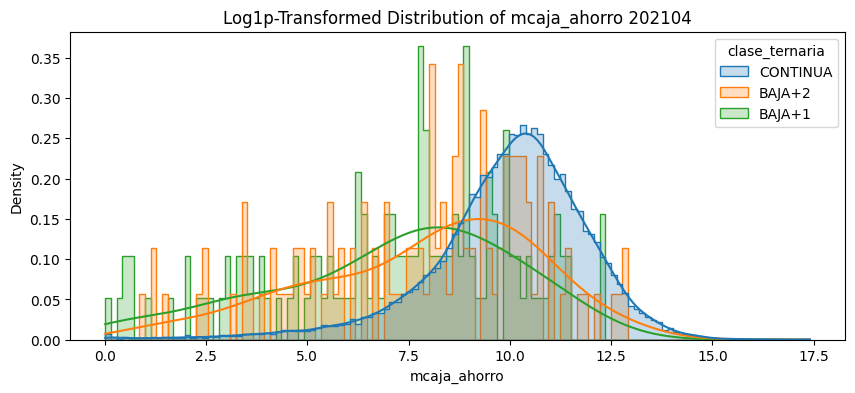

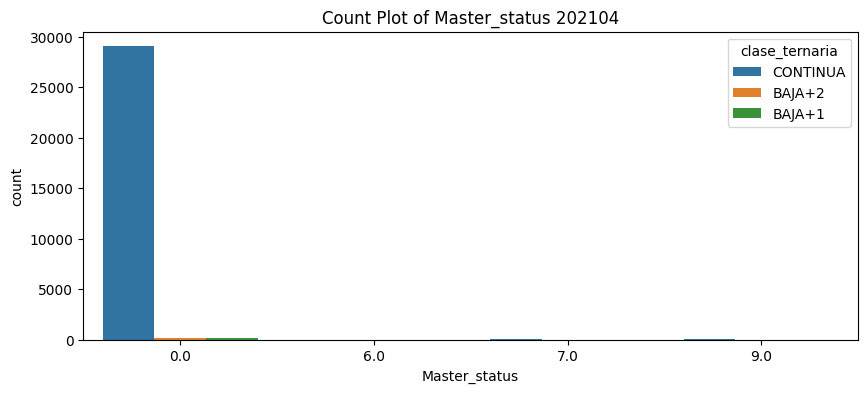

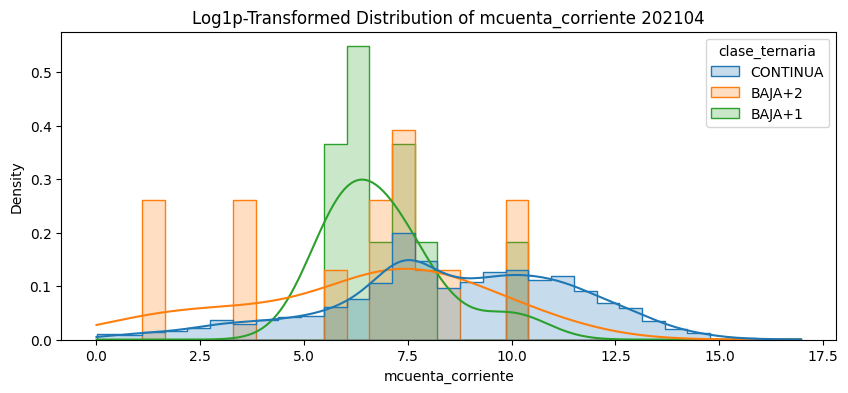

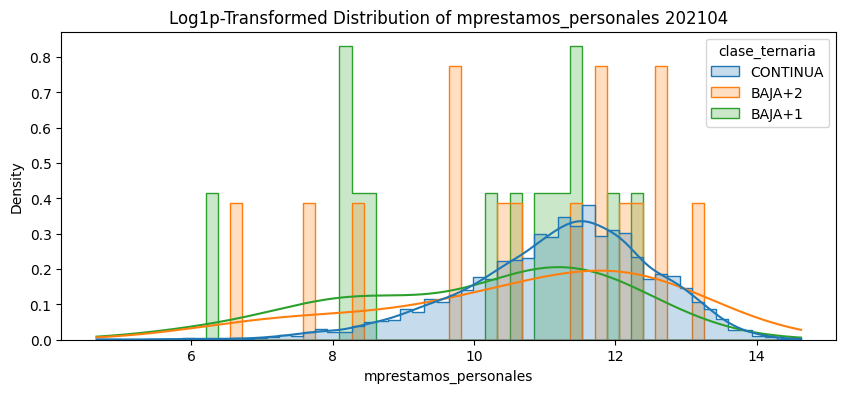

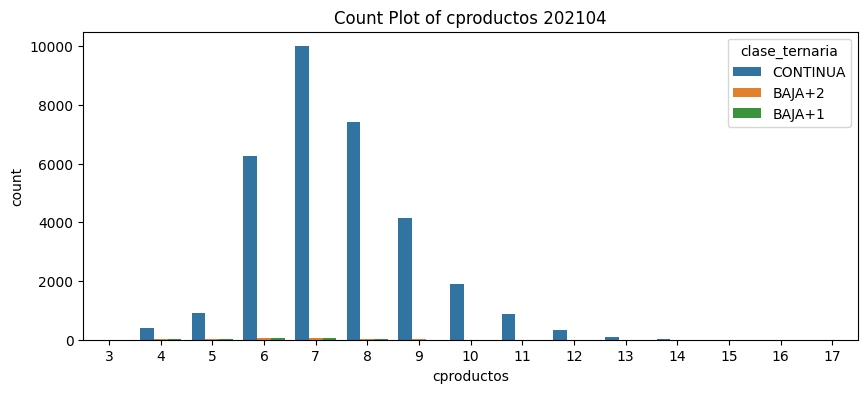

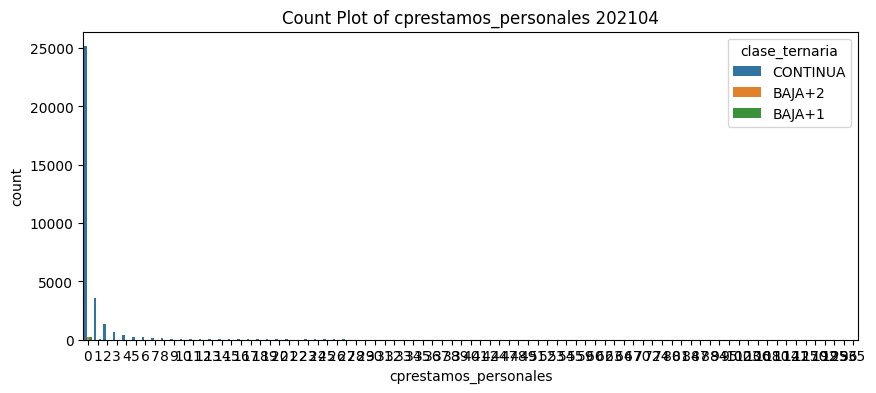

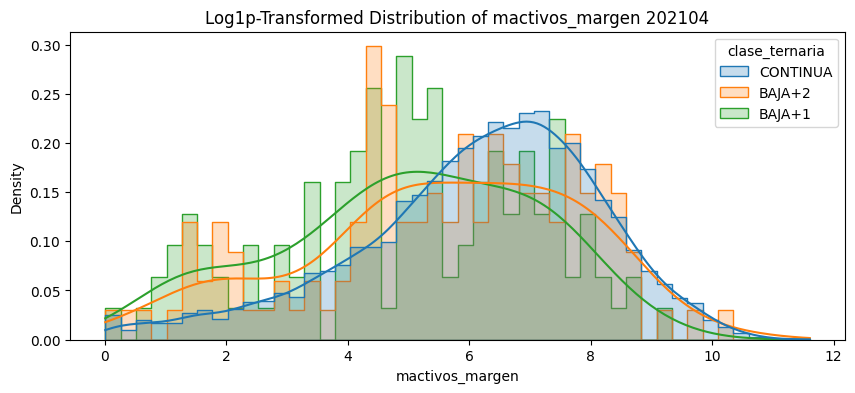

Distribution of Numerical Features - Historical Data


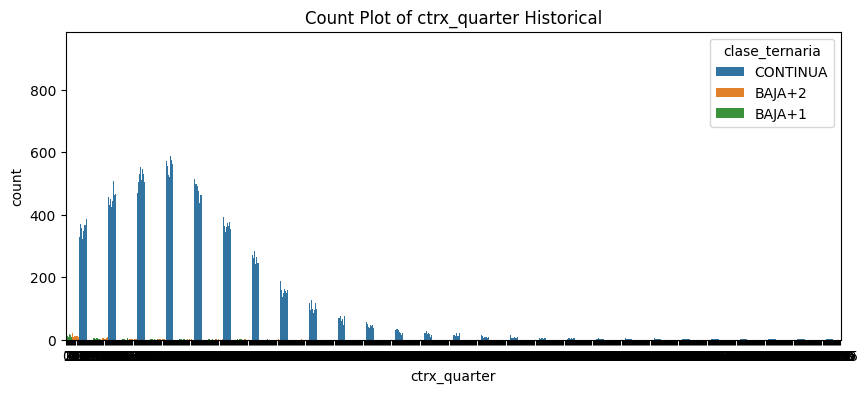

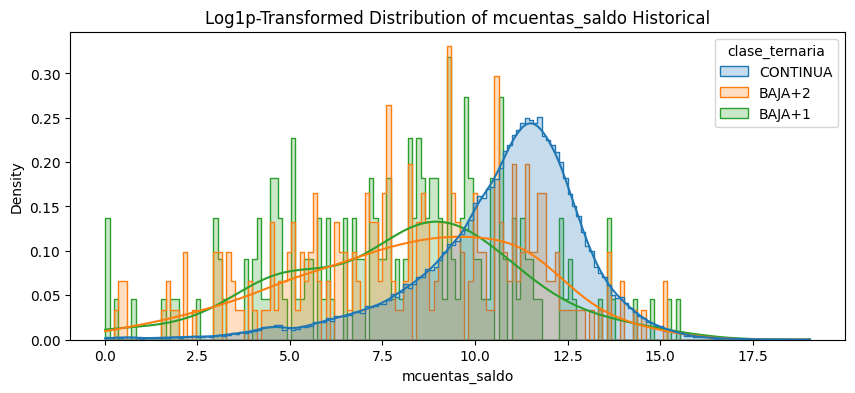

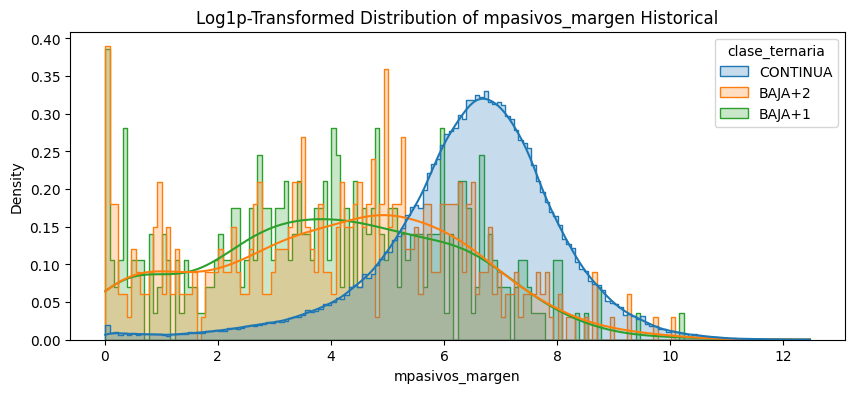

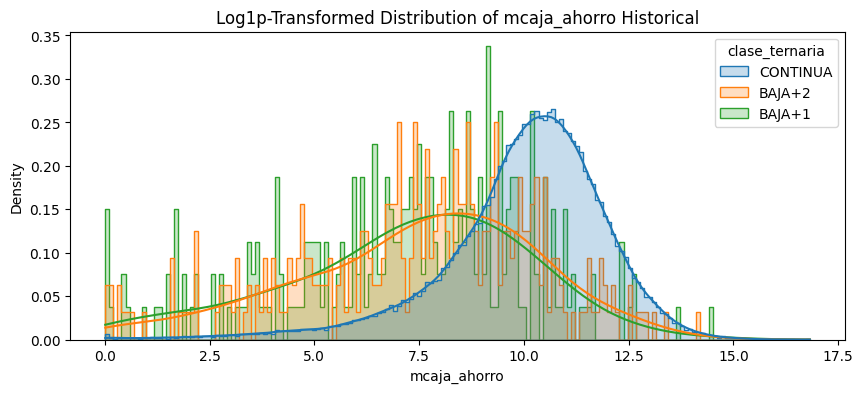

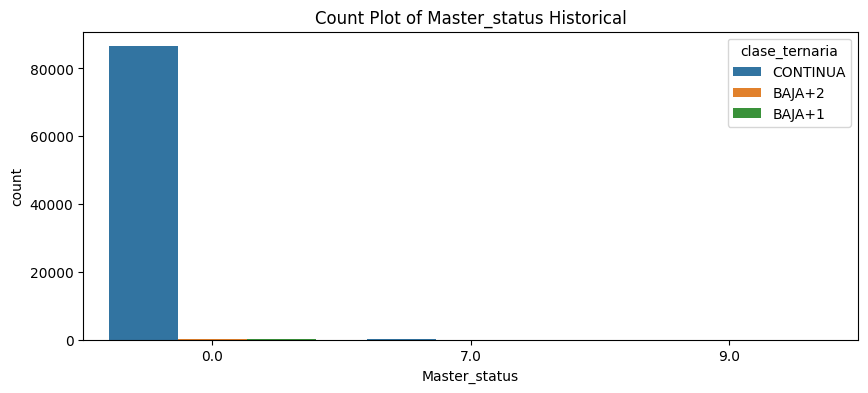

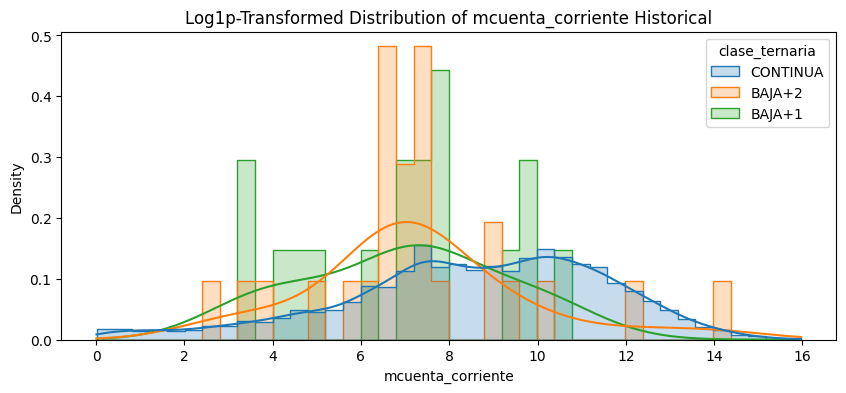

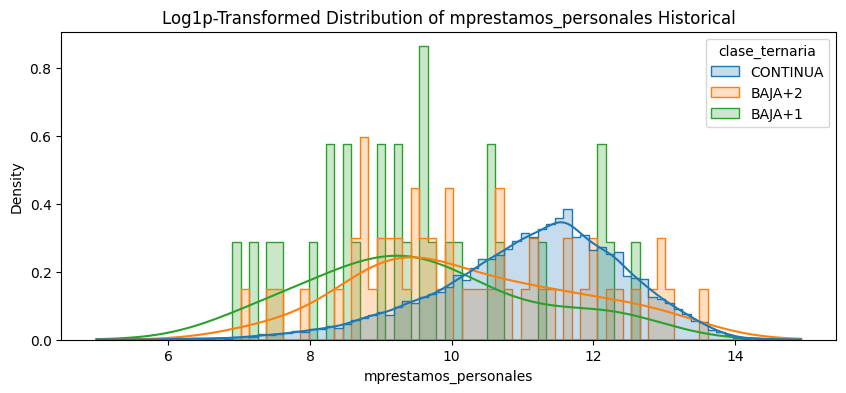

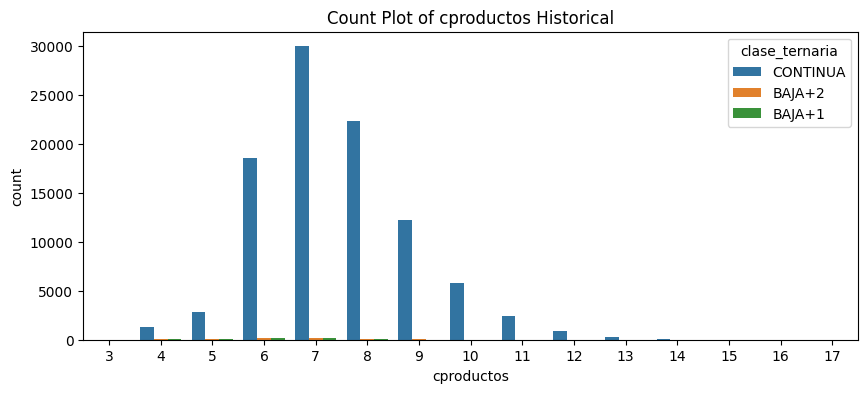

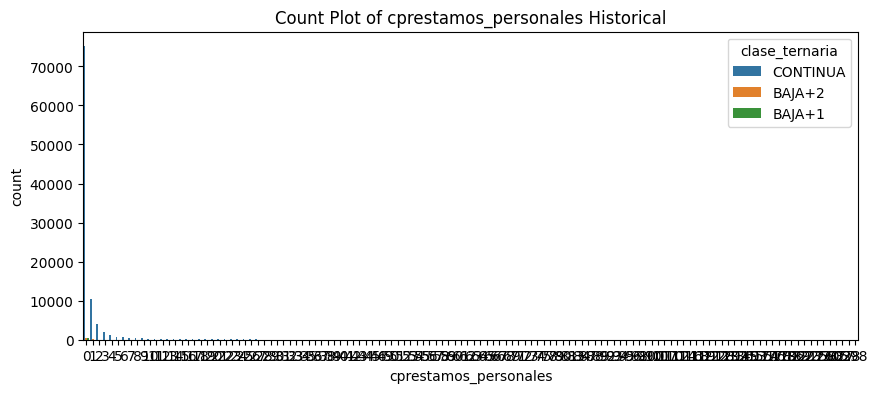

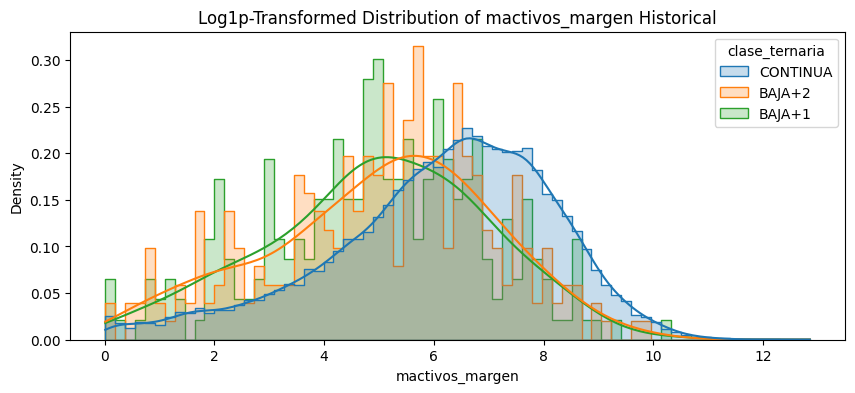

Correlation Matrix - 202104 Data


C:\Users\santt\AppData\Local\Temp\ipykernel_9176\1968736853.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[target] = data[target].map({"CONTINUA": 0, "BAJA+1": 1, "BAJA+2": 2}).astype(float)


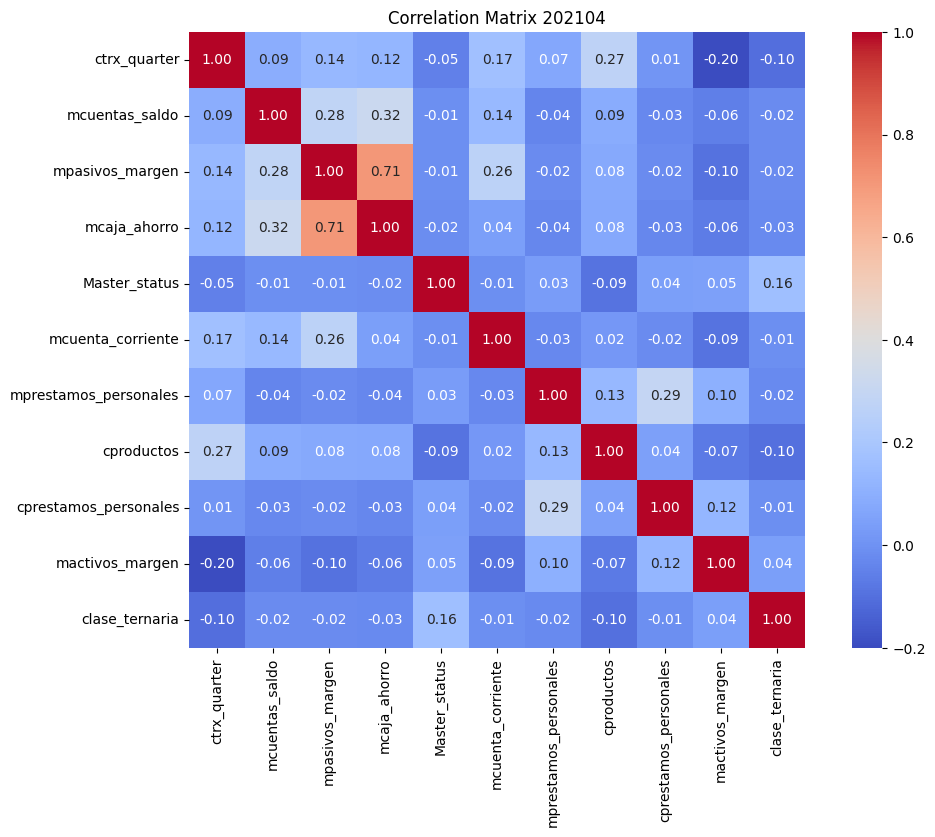

Correlation Matrix - Historical Data


C:\Users\santt\AppData\Local\Temp\ipykernel_9176\1968736853.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[target] = data[target].map({"CONTINUA": 0, "BAJA+1": 1, "BAJA+2": 2}).astype(float)


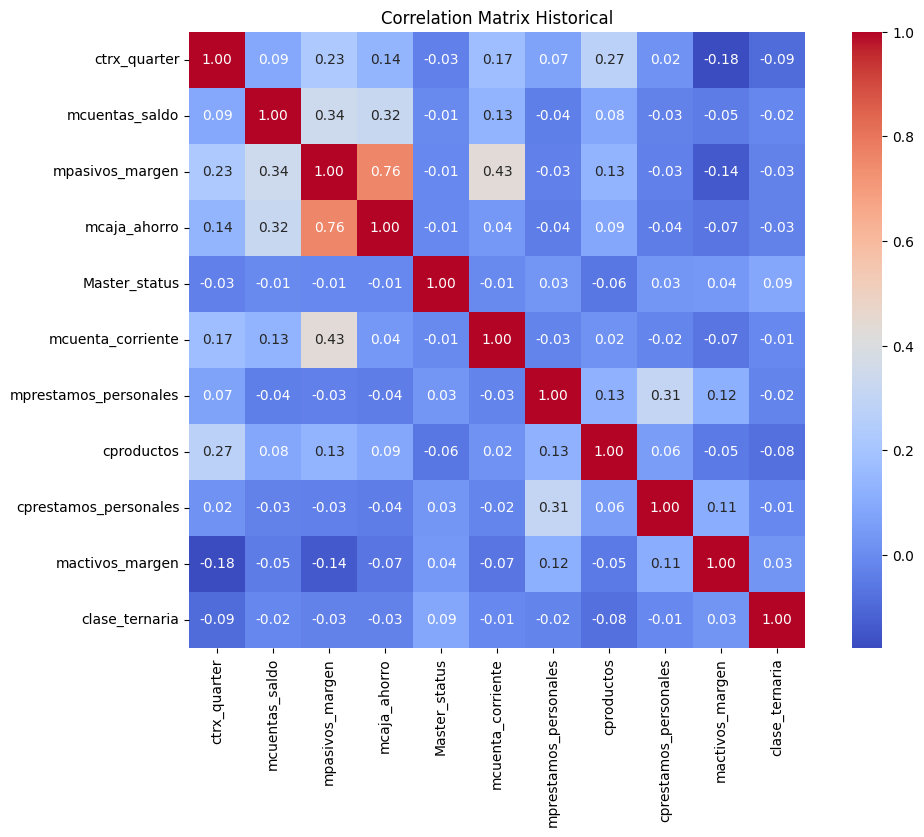

Missing Values - 202104 Data
Master_status    10.281553
dtype: float64
Missing Values - Historical Data
Master_status    10.432122
dtype: float64
Boxplots - 202104 Data


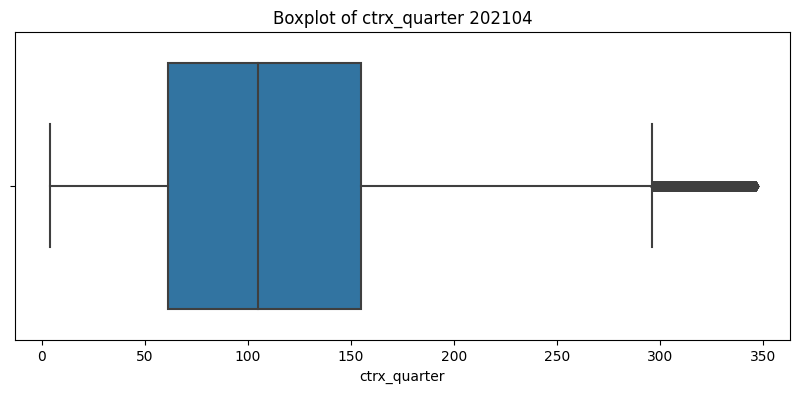

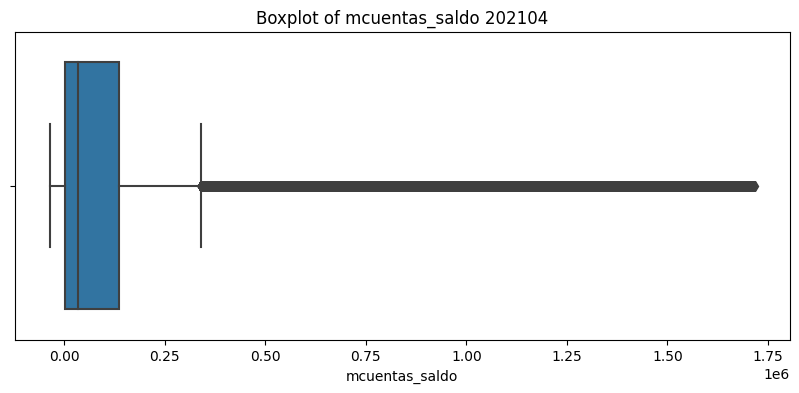

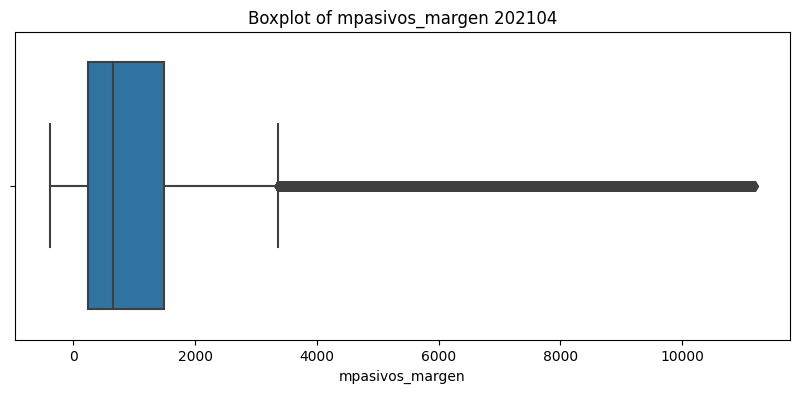

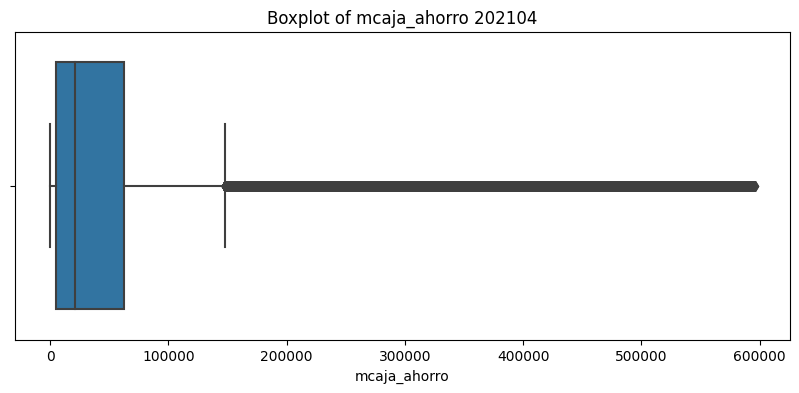

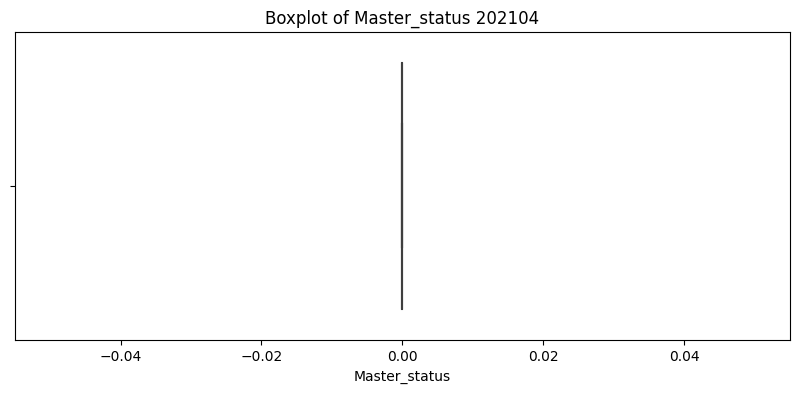

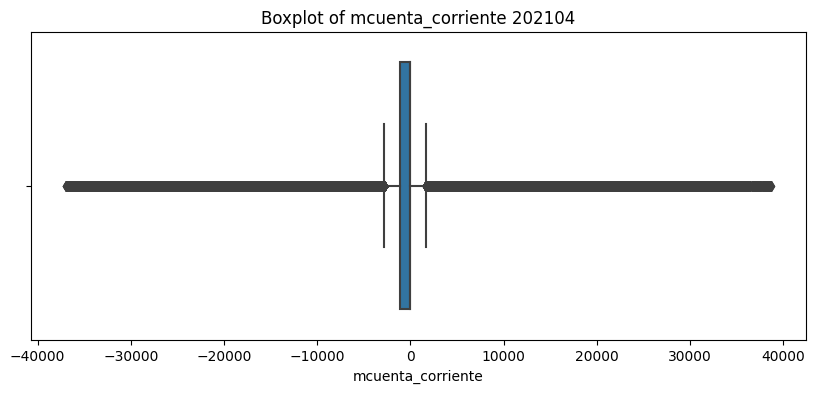

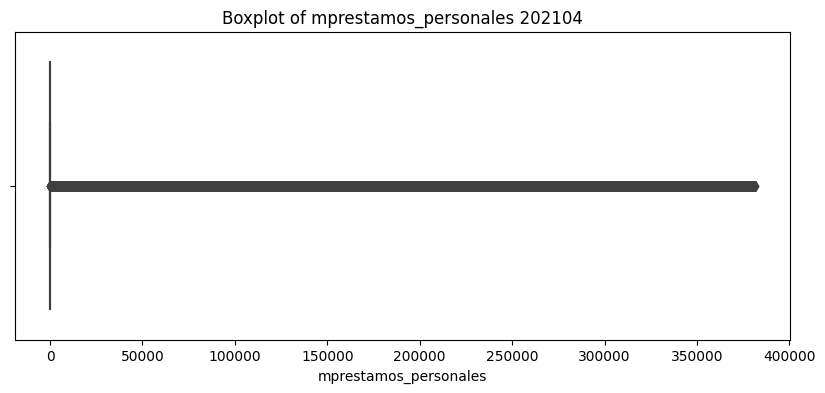

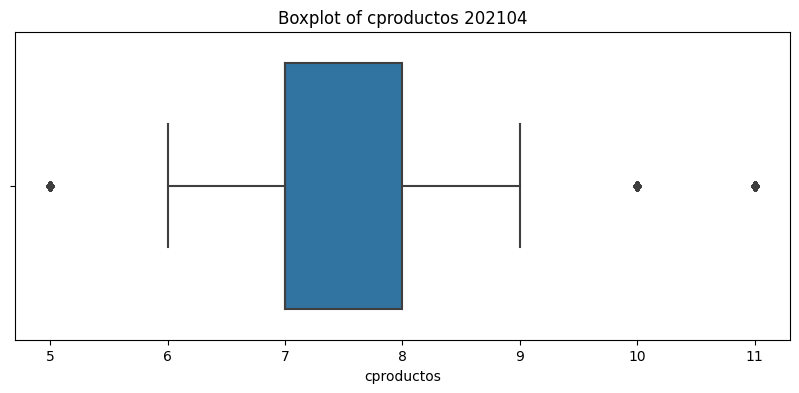

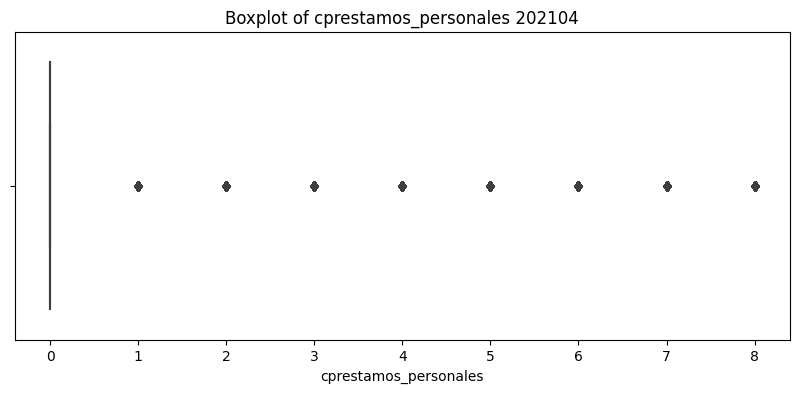

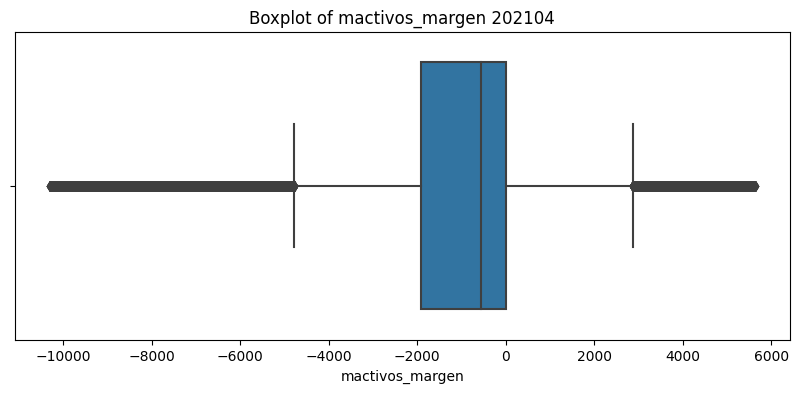

Boxplots - Historical Data


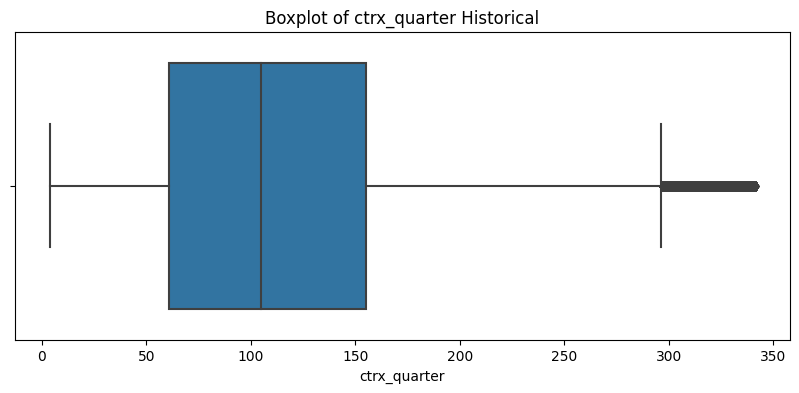

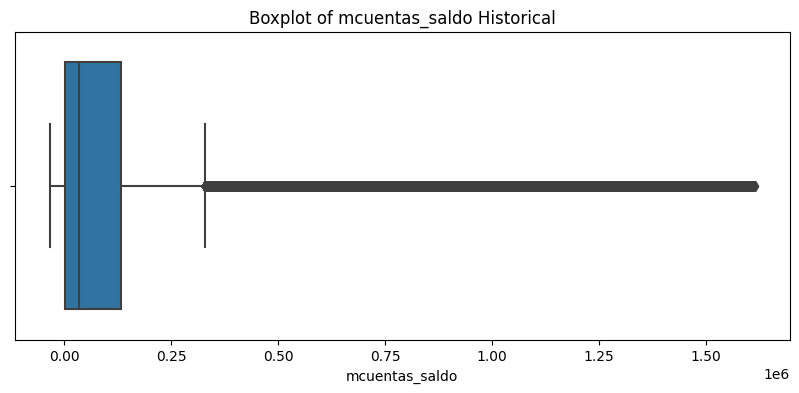

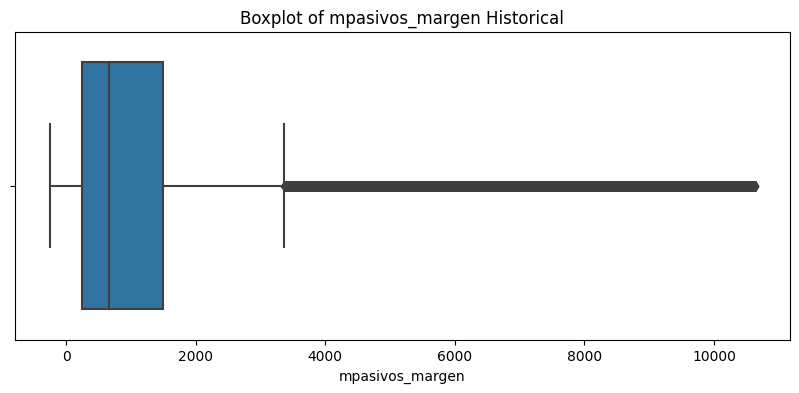

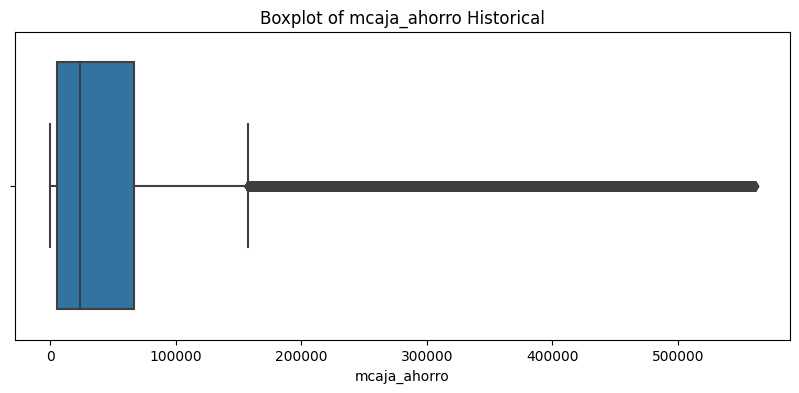

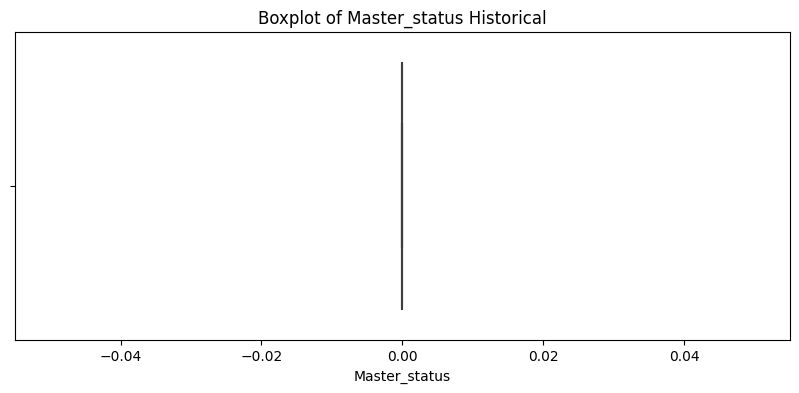

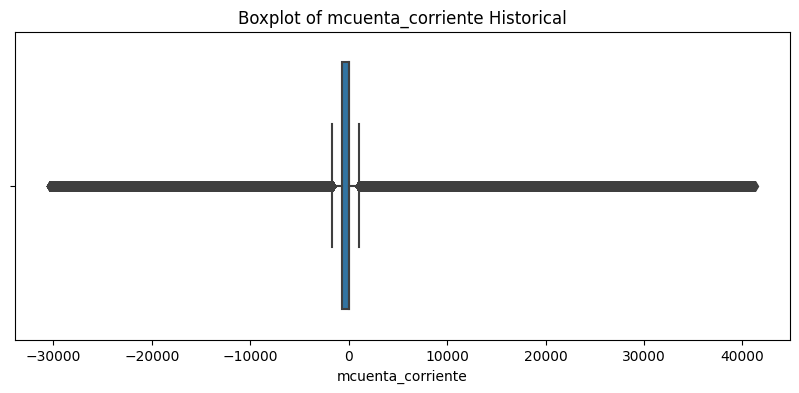

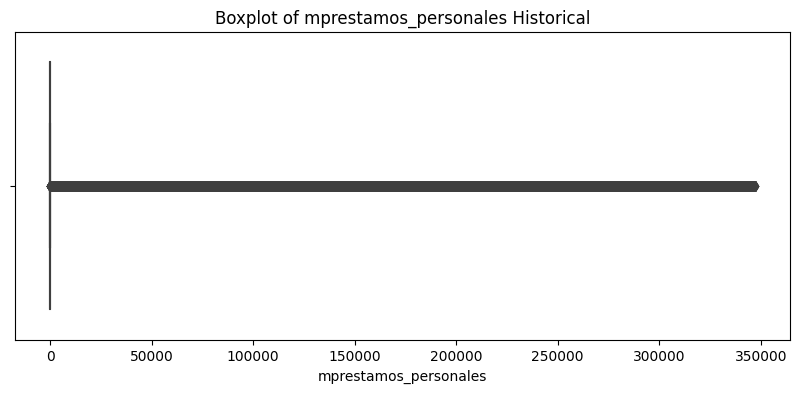

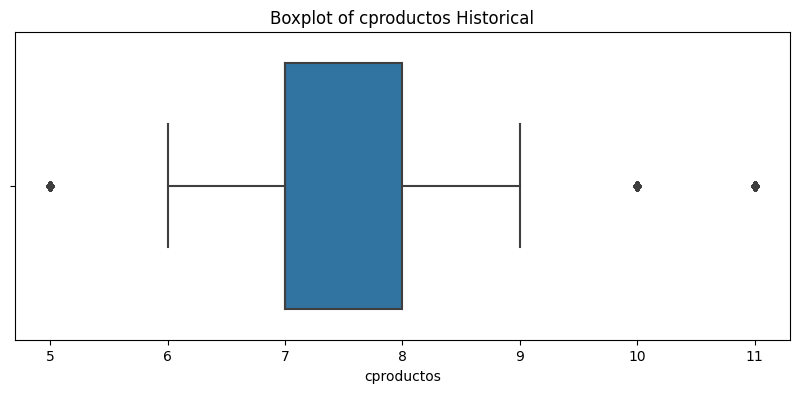

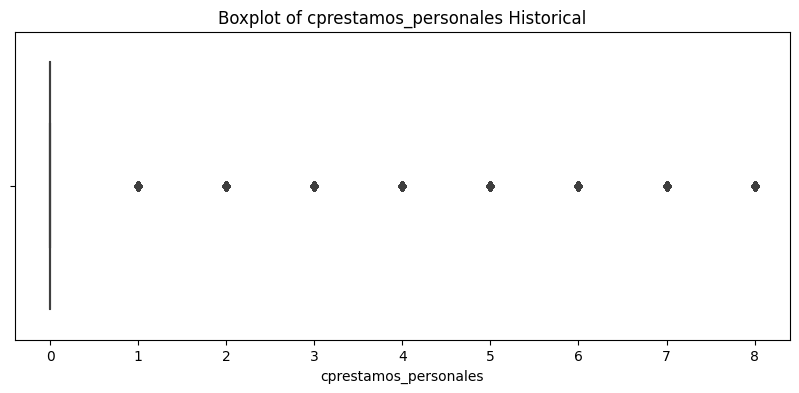

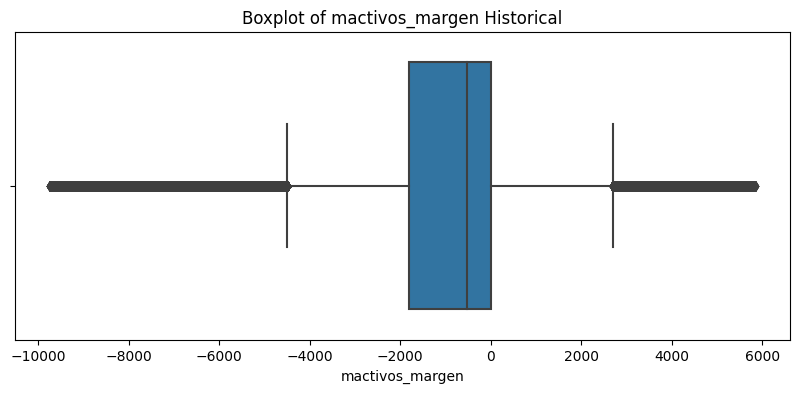

Feature-Target Relationship - 202104 Data


c:\Users\santt\.conda\envs\dm_eyf\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\santt\.conda\envs\dm_eyf\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\santt\.conda\envs\dm_eyf\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\santt\.conda\envs\dm_eyf\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\santt\.conda\envs\dm_eyf\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\santt\.conda\envs\dm_eyf\Lib\site-packages\seaborn\axisg

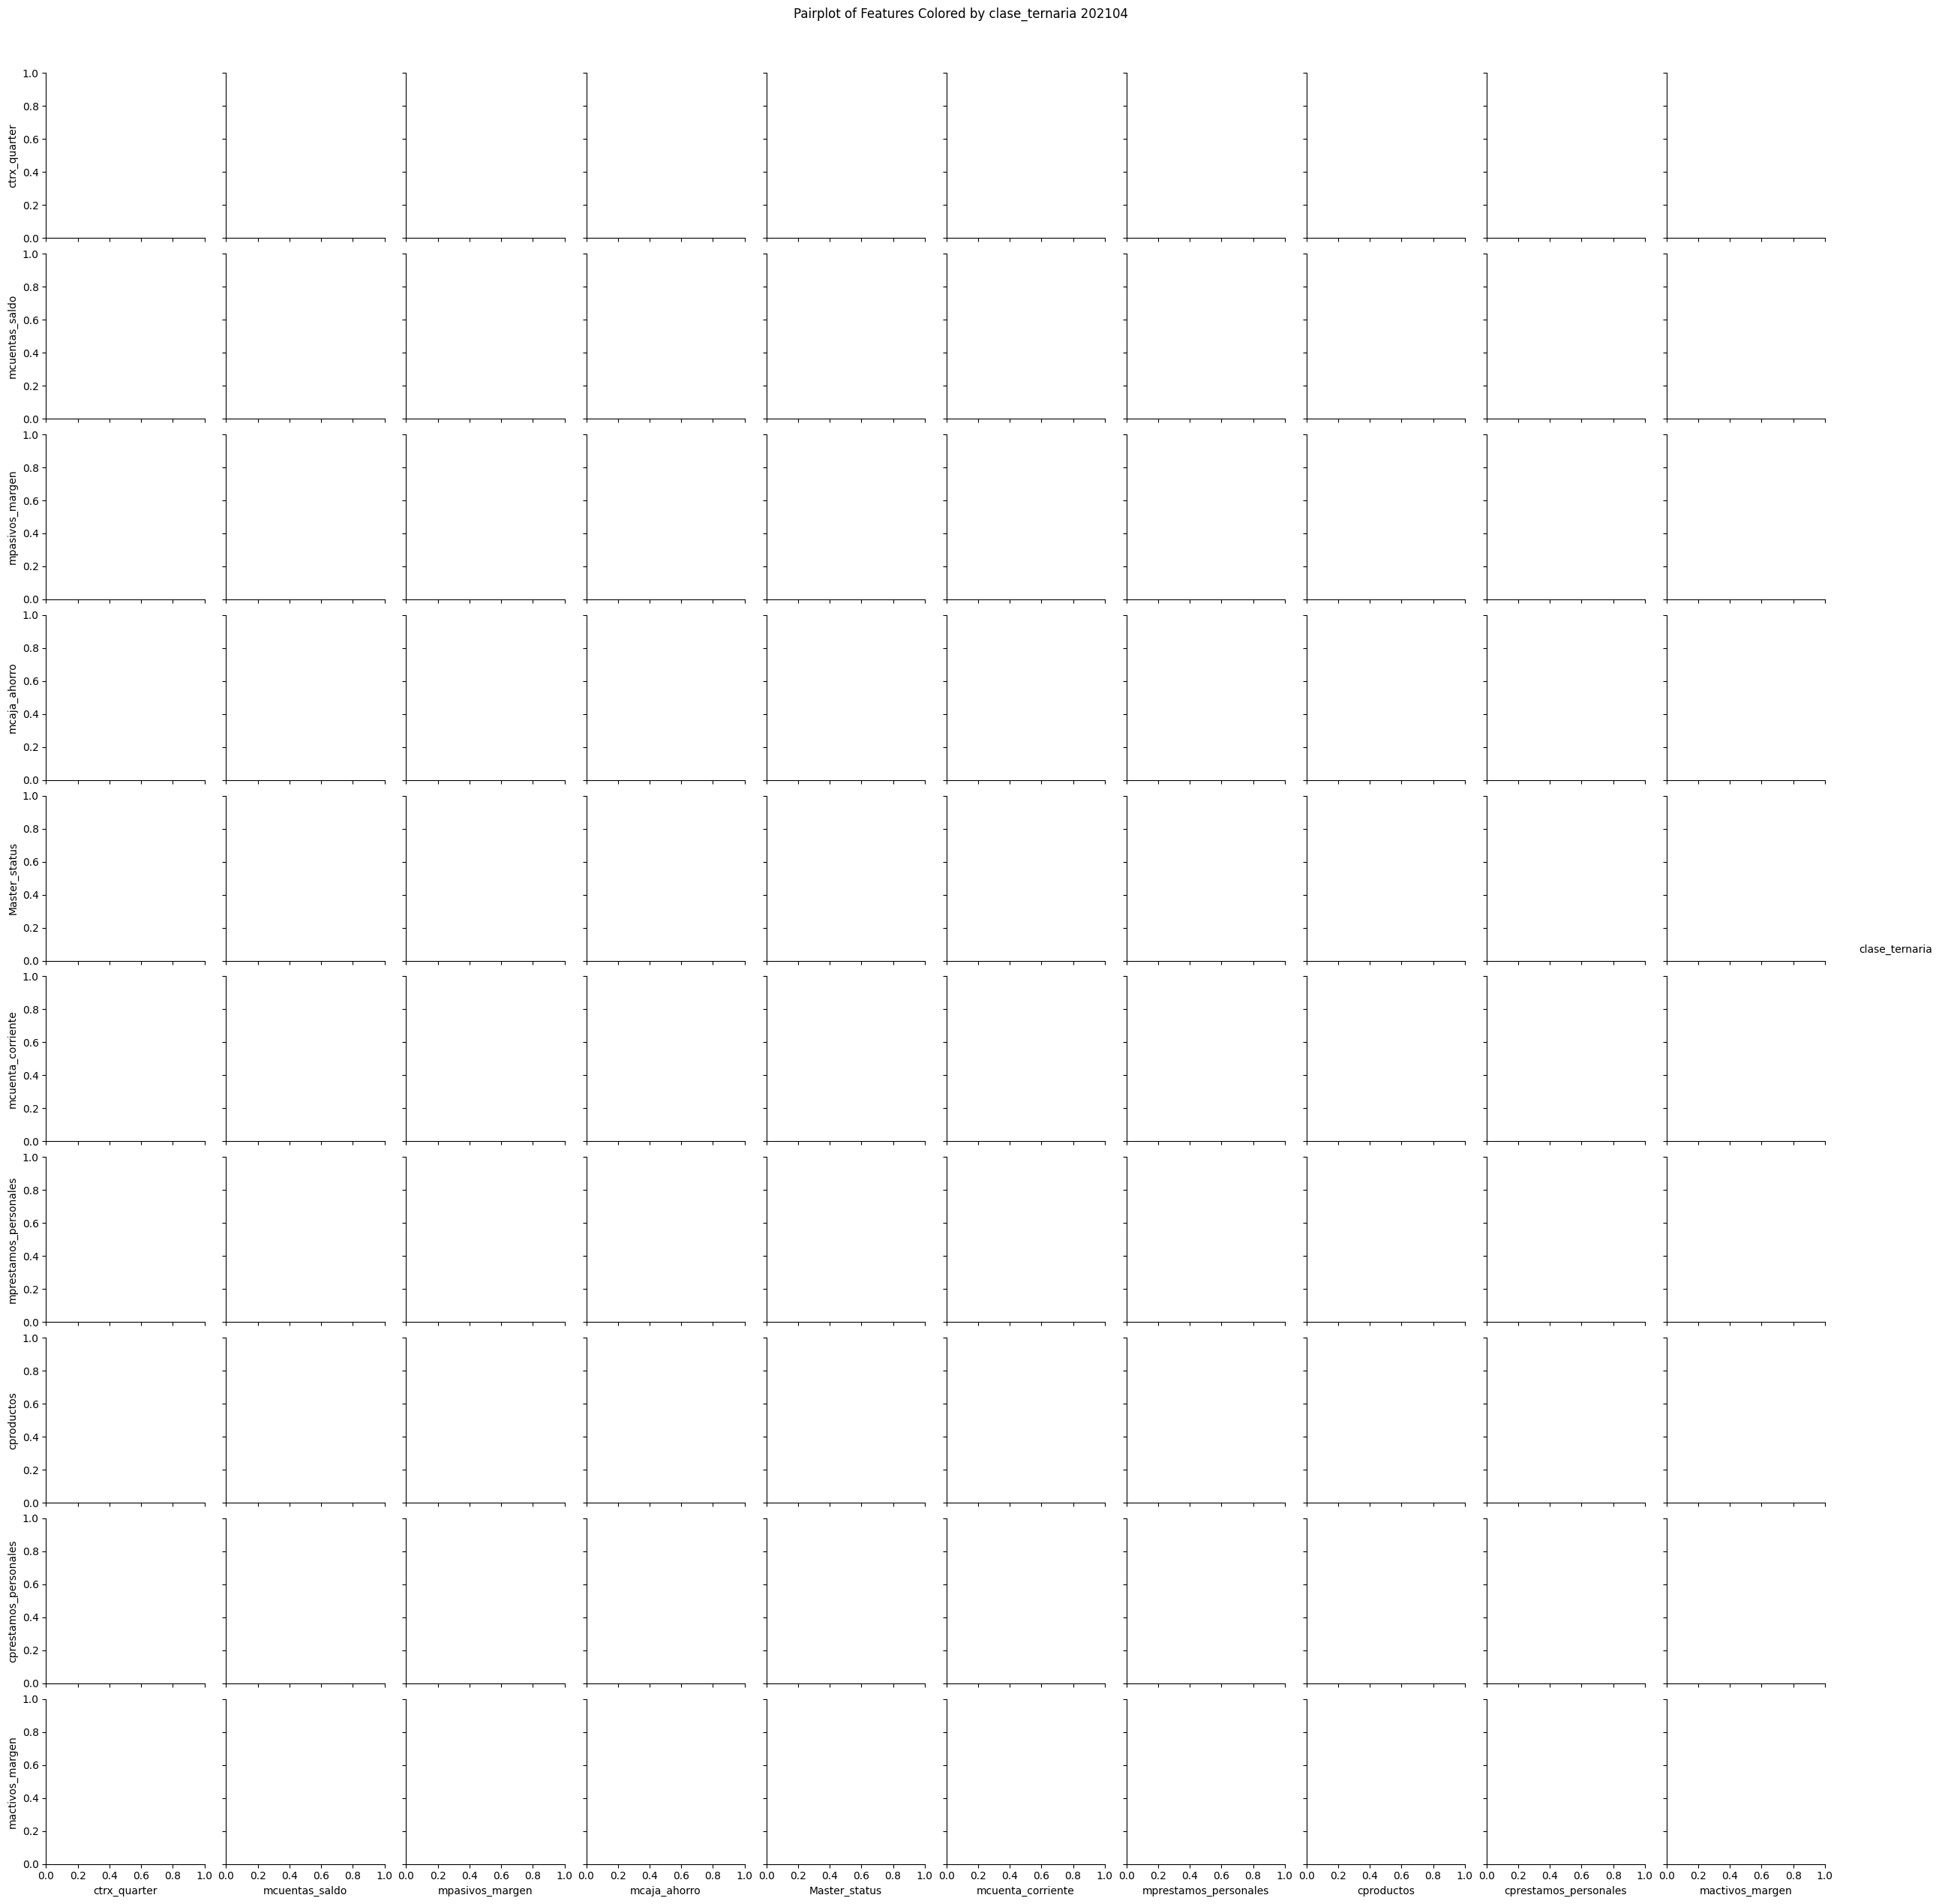

Feature-Target Relationship - Historical Data


c:\Users\santt\.conda\envs\dm_eyf\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\santt\.conda\envs\dm_eyf\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\santt\.conda\envs\dm_eyf\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\santt\.conda\envs\dm_eyf\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\santt\.conda\envs\dm_eyf\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\santt\.conda\envs\dm_eyf\Lib\site-packages\seaborn\axisg

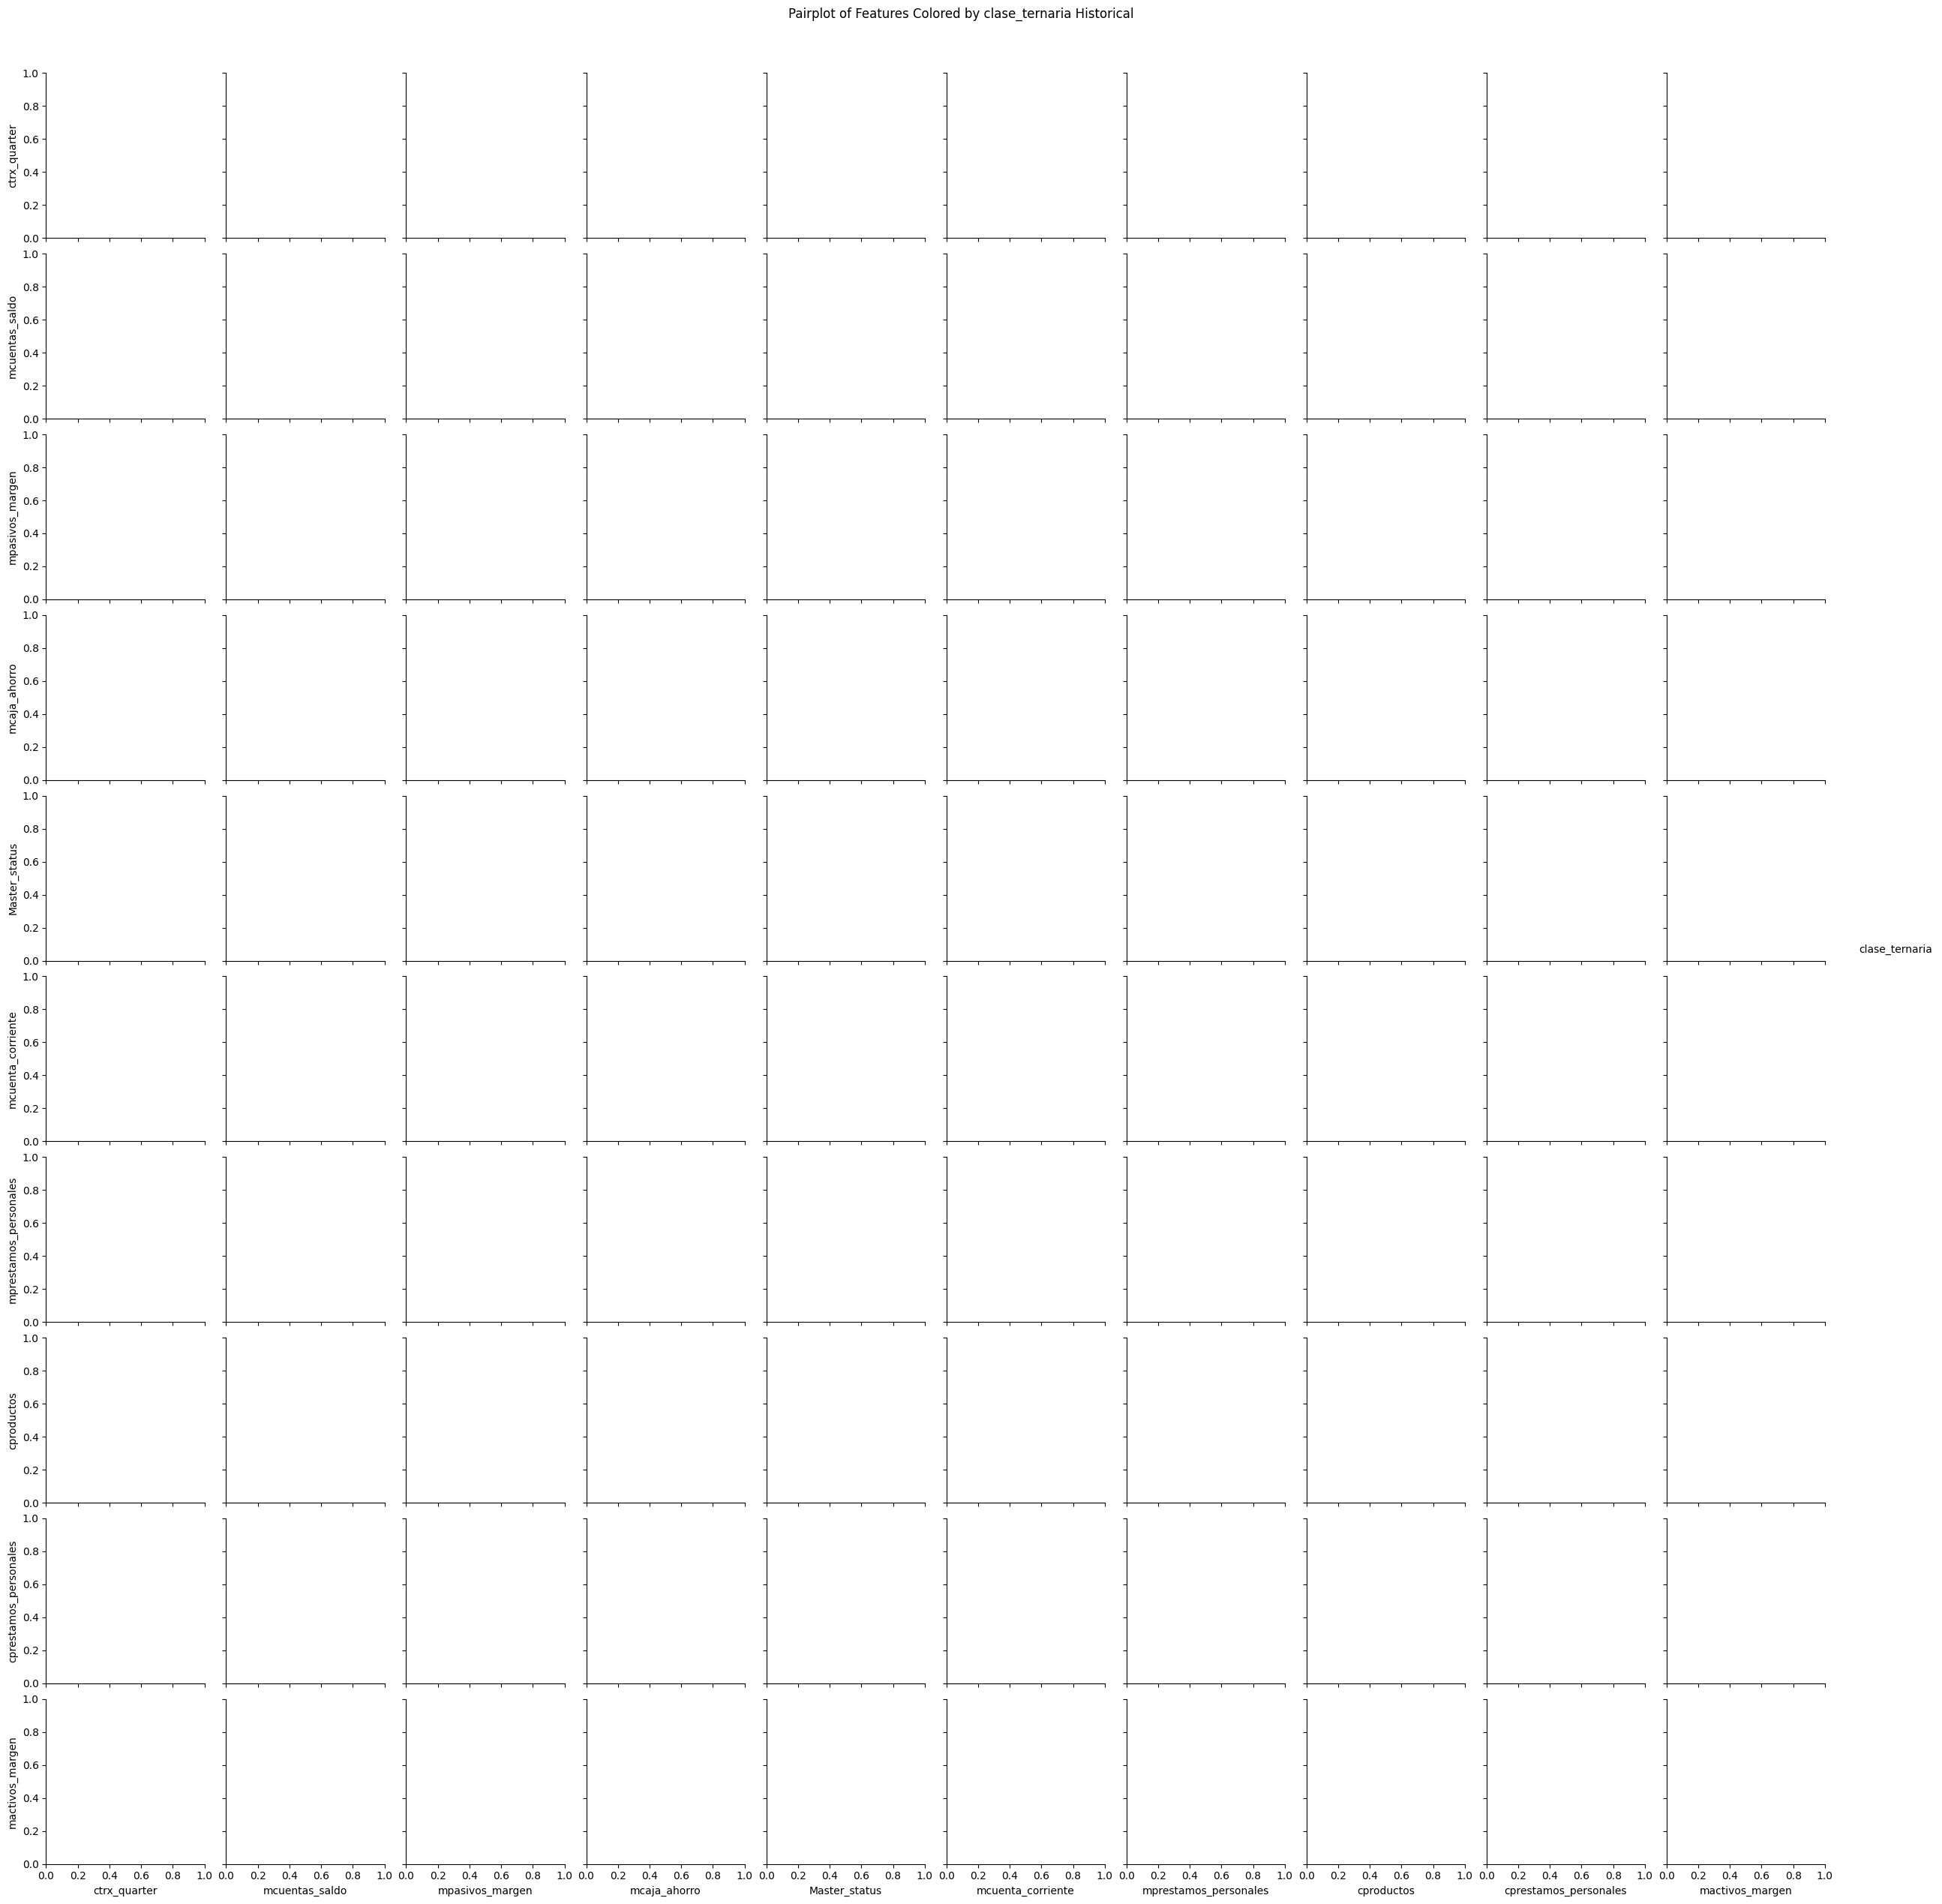

Target Distribution - 202104 Data


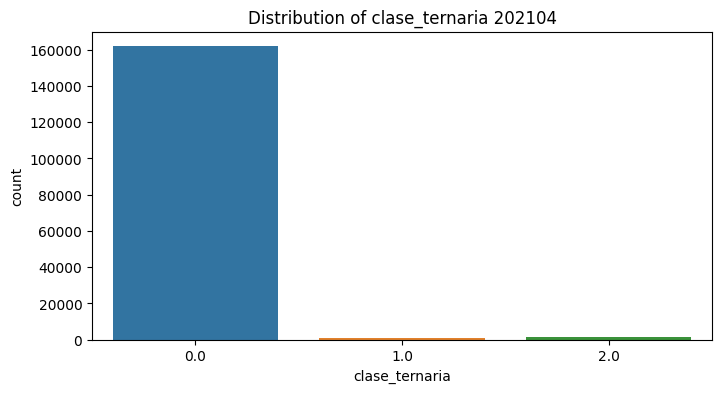

Target Distribution - Historical Data


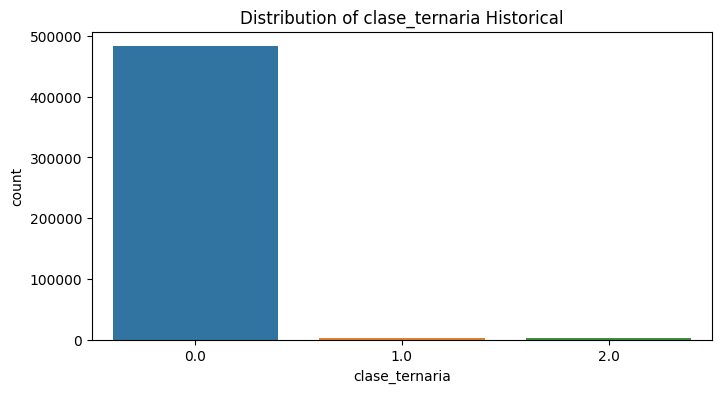

Violin Plots by Target - 202104 Data


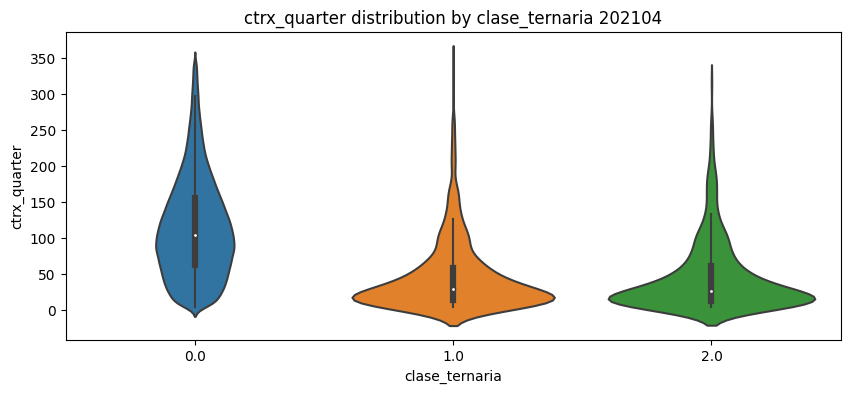

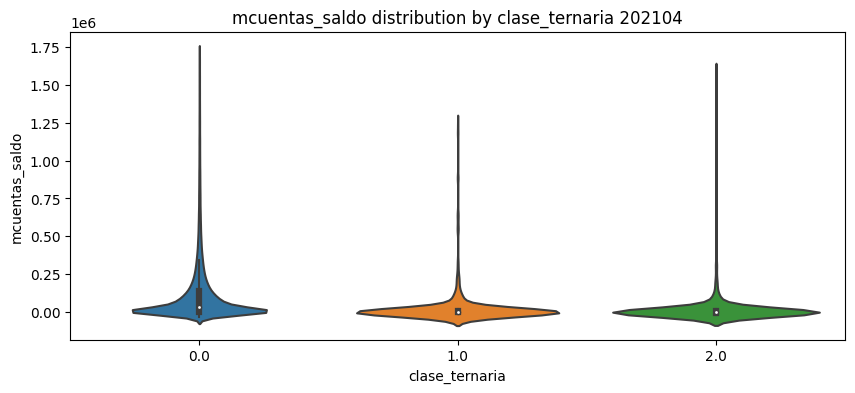

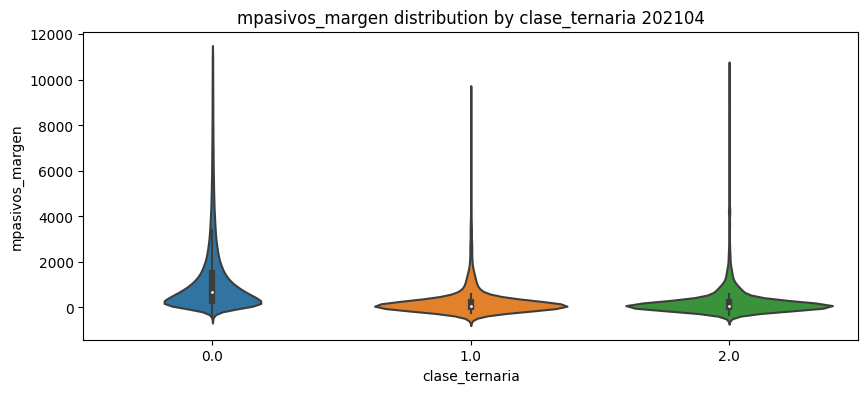

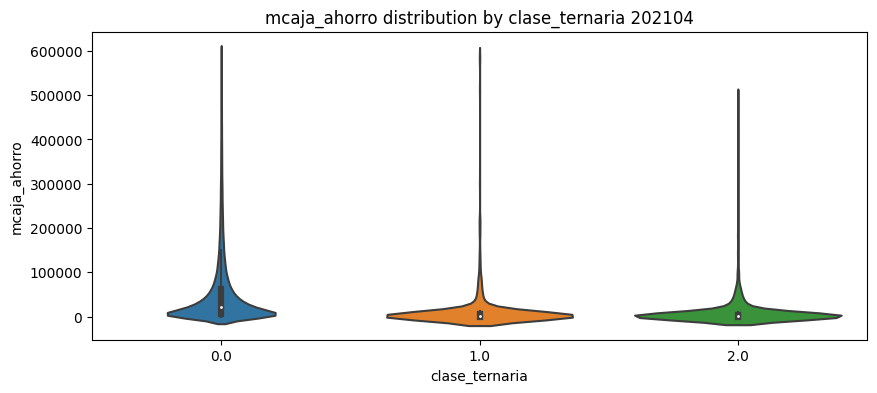

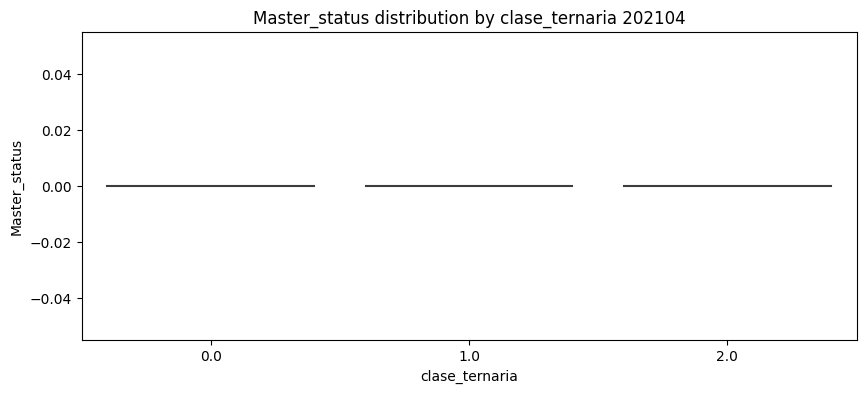

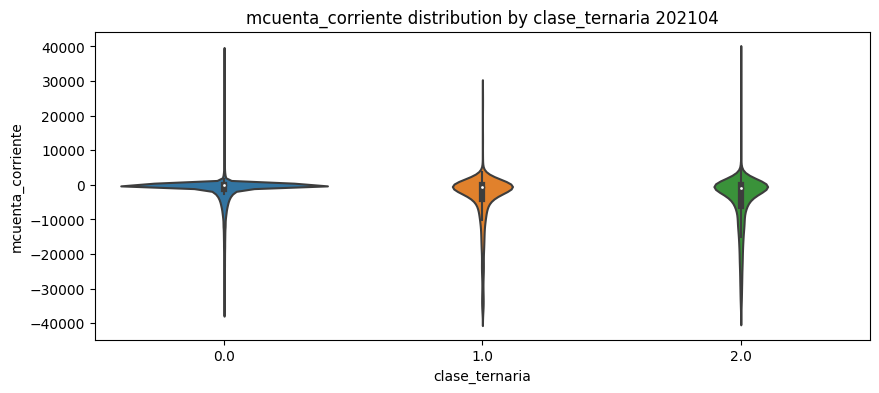

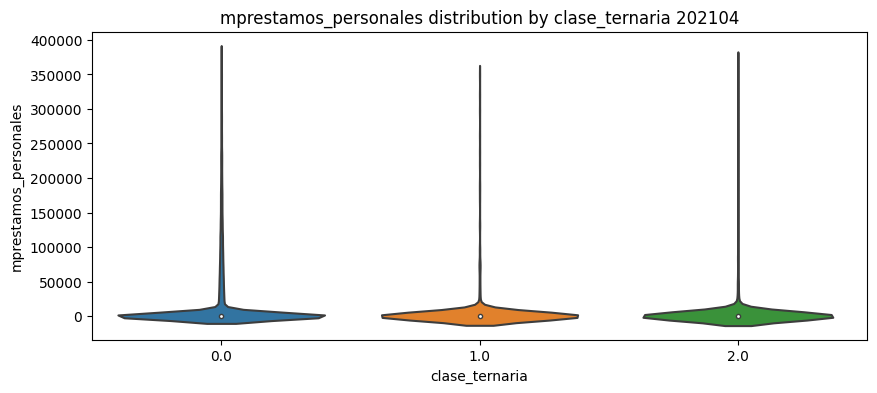

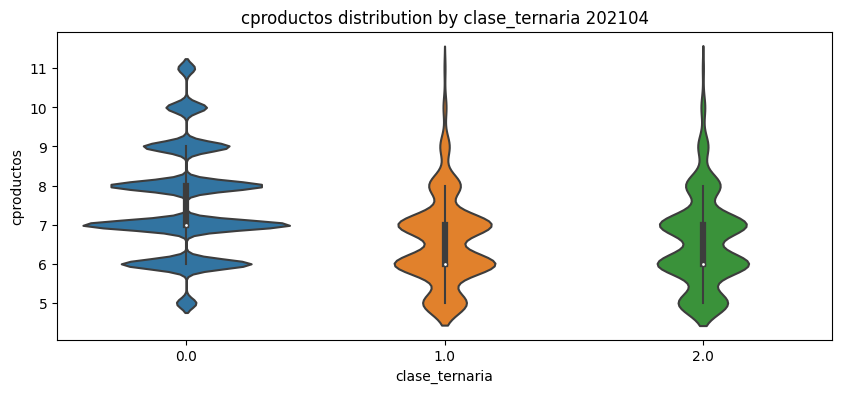

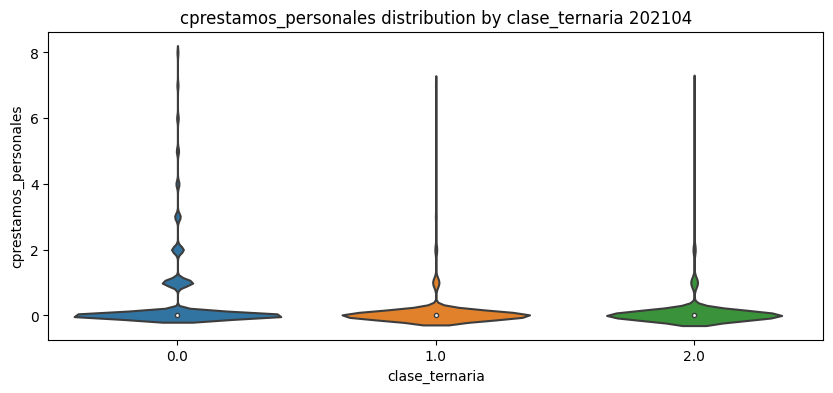

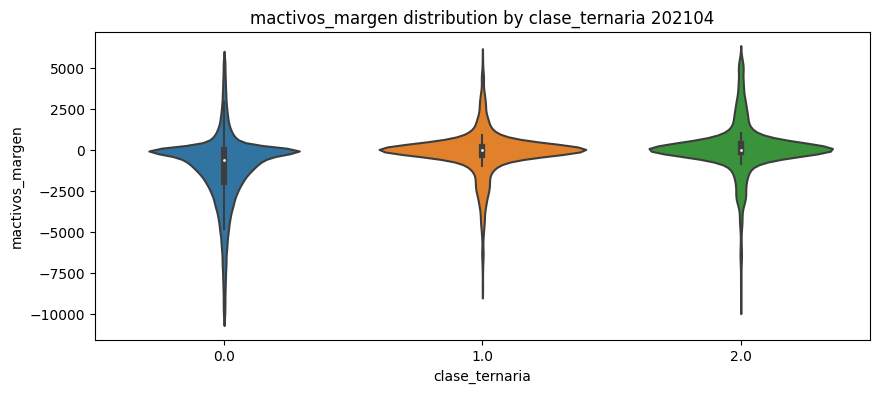

Violin Plots by Target - Historical Data


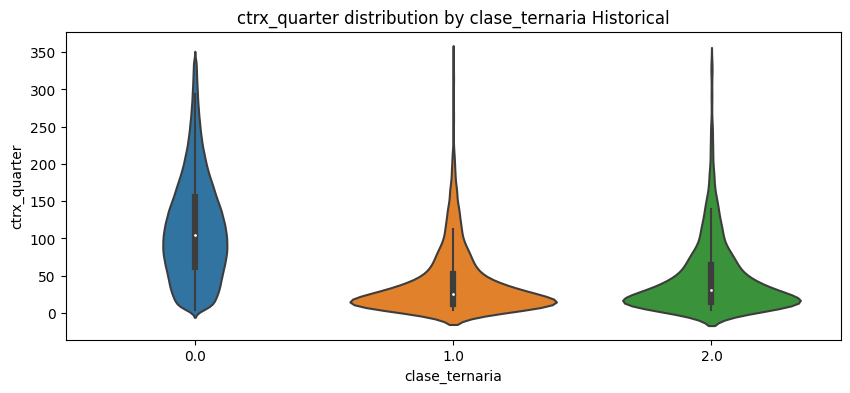

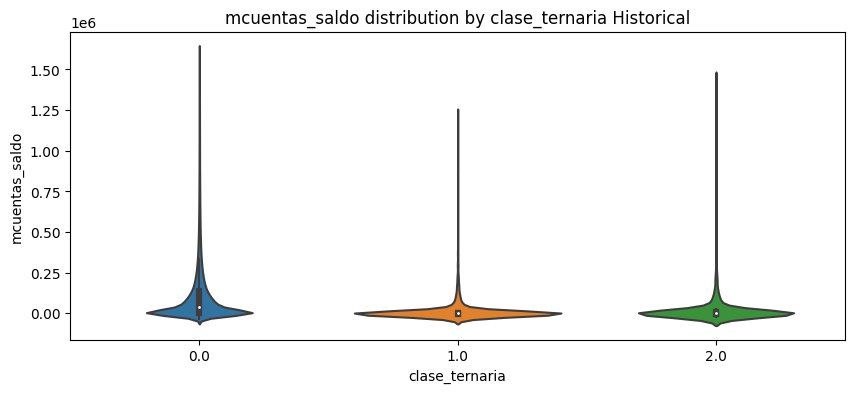

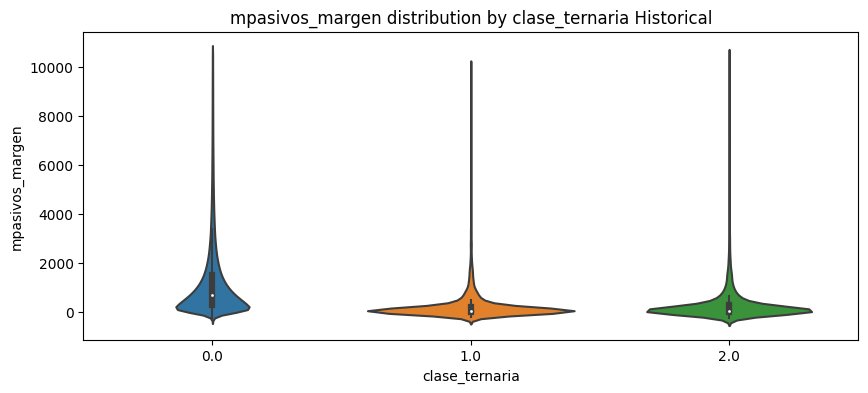

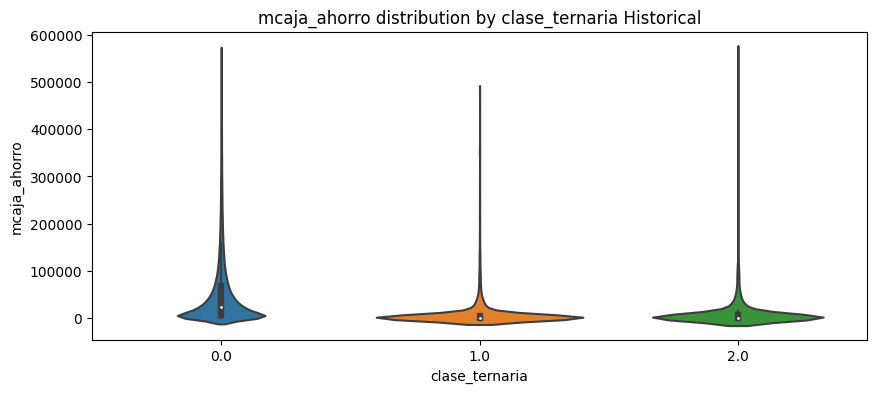

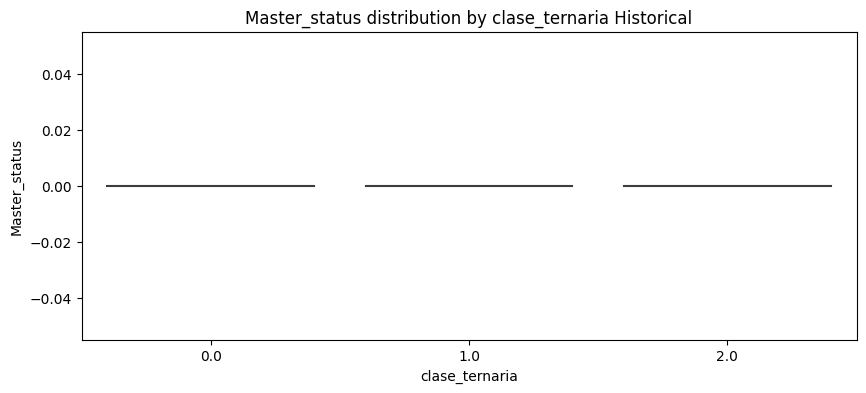

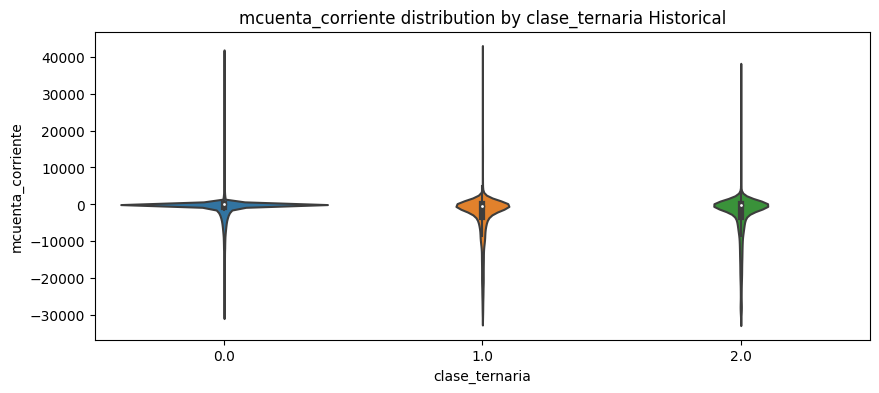

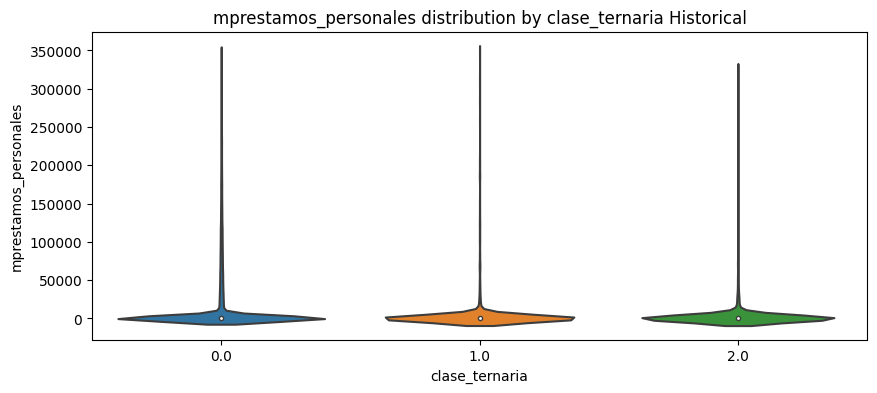

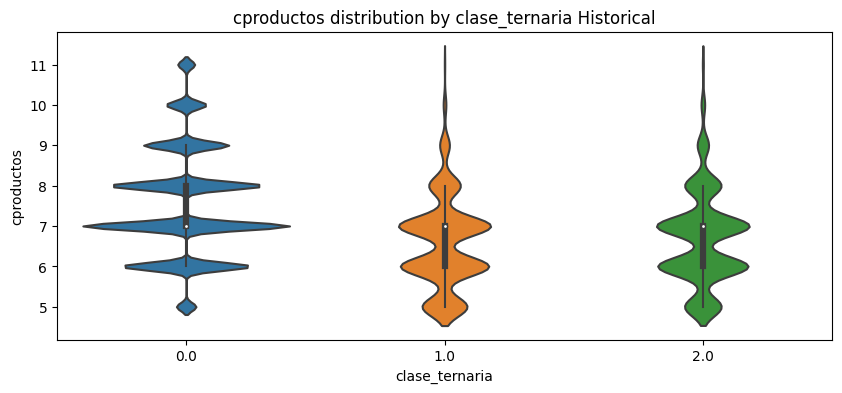

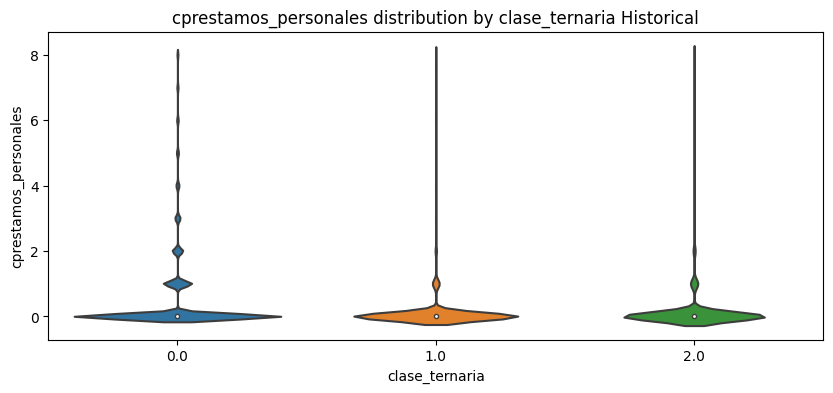

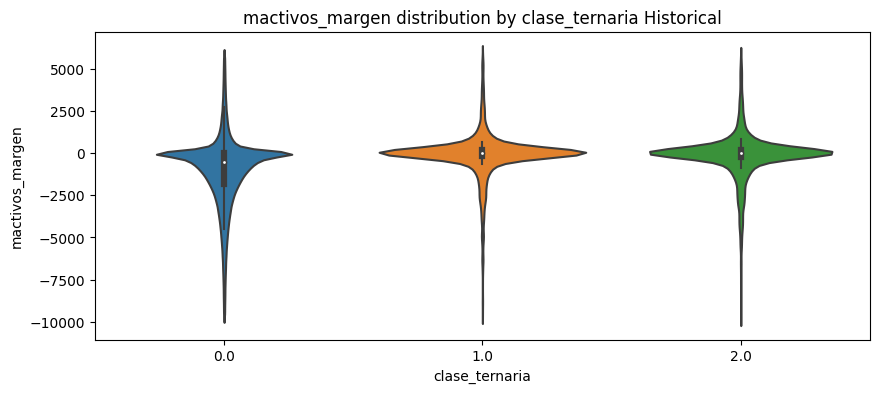

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

target = 'clase_ternaria'  # Your target variable

# Assuming you have your list of the top 10 most relevant variables
top_features_with_target = list(top_features_rf.feature)[0:10] + [target]

# Select the top features for the 202104 and historical datasets
data_pres_top = select_top_features(data_pres, top_features_with_target)
data_hist_top = select_top_features(data_hist, top_features_with_target)

# Convert specified columns to continuous (float) in data_pres_top and data_hist_top
columns_to_convert = ['ctrx_quarter', 'cprestamos_personales', 'cproductos']

data_pres_top.loc[:, columns_to_convert] = data_pres_top[columns_to_convert].astype(float)
data_hist_top.loc[:, columns_to_convert] = data_hist_top[columns_to_convert].astype(float)

# Summary statistics
print("Summary Statistics - 202104 Data")
print(summary_statistics(data_pres_top))

print("Summary Statistics - Historical Data")
print(summary_statistics(data_hist_top))

# Distribution of numerical features
numeric_features = data_pres_top.select_dtypes(include=[np.number]).columns.tolist()
# numeric_features.remove(target)  # Exclude target from numeric features

print("Distribution of Numerical Features - 202104 Data")
plot_distributions(data_pres_top, numeric_features, target=target, title_suffix='202104')

print("Distribution of Numerical Features - Historical Data")
plot_distributions(data_hist_top, numeric_features, target=target, title_suffix='Historical')

# Correlation Matrix
print("Correlation Matrix - 202104 Data")
plot_correlation_matrix(data_pres_top, target=target, title_suffix='202104')

print("Correlation Matrix - Historical Data")
plot_correlation_matrix(data_hist_top, target=target, title_suffix='Historical')

# Missing Values Analysis
print("Missing Values - 202104 Data")
print(missing_values_analysis(data_pres_top))

print("Missing Values - Historical Data")
print(missing_values_analysis(data_hist_top))

# Boxplots for outlier identification
print("Boxplots - 202104 Data")
plot_boxplots(data_pres_top, numeric_features, title_suffix='202104')

print("Boxplots - Historical Data")
plot_boxplots(data_hist_top, numeric_features, title_suffix='Historical')

# Feature-Target Relationship - Pairplot
print("Feature-Target Relationship - 202104 Data")
plot_feature_target_relationship(data_pres_top, numeric_features, target=target, title_suffix='202104')

print("Feature-Target Relationship - Historical Data")
plot_feature_target_relationship(data_hist_top, numeric_features, target=target, title_suffix='Historical')

# Target Distribution
print("Target Distribution - 202104 Data")
plot_target_distribution(data_pres_top, target=target, title_suffix='202104')

print("Target Distribution - Historical Data")
plot_target_distribution(data_hist_top, target=target, title_suffix='Historical')

# Violin Plots by Target
print("Violin Plots by Target - 202104 Data")
plot_violin_by_target(data_pres_top, numeric_features, target=target, title_suffix='202104')

print("Violin Plots by Target - Historical Data")
plot_violin_by_target(data_hist_top, numeric_features, target=target, title_suffix='Historical')

# Analyze Categorical Features if any
categorical_features = data_pres_top.select_dtypes(include=['object', 'category']).columns.tolist()
if len(categorical_features) > 0:
    print("Categorical Features Analysis - 202104 Data")
    analyze_categorical_features(data_pres_top, categorical_features, title_suffix='202104')

    print("Categorical Features Analysis - Historical Data")
    analyze_categorical_features(data_hist_top, categorical_features, title_suffix='Historical')


Usando ydata_profiling

In [60]:
data_pres[top_features_rf.feature[0:20]]

,ctrx_quarter,mcuentas_saldo,mpasivos_margen,mcaja_ahorro,Master_status,mcuenta_corriente,mprestamos_personales,cproductos,cprestamos_personales,mactivos_margen,Visa_status,mrentabilidad_annual,mcomisiones_otras,Visa_mfinanciacion_limite,mcomisiones,mrentabilidad,cliente_edad,ccajas_consultas,mpayroll,mcomisiones_mantenimiento
3,101,-31678.24,356.15,5219.80,0.0,-8791.20,259925.31,10,1,488.61,0.0,7231.49,1619.99,405388.80,1619.99,2610.89,52,0,131036.31,0.00
9,383,1204328.61,12978.11,298180.41,0.0,584019.10,0.00,8,0,-19824.66,0.0,148364.69,2110.74,737669.19,2110.74,-5920.26,44,0,0.00,-3413.33
15,124,93331.72,2081.09,23580.95,0.0,0.00,0.00,7,0,-11061.01,0.0,3313.76,4885.61,354715.20,4885.61,-5647.83,59,0,0.00,2505.95
21,50,15005.76,188.63,4239.08,0.0,-4990.61,0.00,7,0,-468.37,0.0,6041.61,2241.29,152020.80,2241.29,1913.16,65,0,0.00,1622.81
27,90,75273.47,1851.68,121515.15,0.0,0.00,0.00,7,0,-1757.18,0.0,15598.37,585.11,506736.00,585.11,695.96,54,0,0.00,2505.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981915,2,0.00,0.00,0.00,0.0,0.00,0.00,7,0,0.00,0.0,0.00,0.00,444185.77,0.00,0.00,60,0,0.00,0.00
981918,2,0.00,0.00,0.00,0.0,0.00,0.00,7,0,0.00,0.0,0.00,0.00,405388.80,0.00,0.00,48,0,0.00,0.00
981925,2,0.00,0.00,0.00,0.0,0.00,0.00,6,0,0.00,0.0,0.00,0.00,253368.00,0.00,0.00,24,0,35103.80,0.00
981928,8,45.00,711.26,56168.51,0.0,0.00,564799.50,8,1,141.73,0.0,1000.55,0.00,177357.60,0.00,1000.55,29,0,0.00,0.00


In [62]:
from ydata_profiling import ProfileReport

profile_pres = ProfileReport(data_pres[top_features_rf.feature[0:20]], title="Profiling Report 202104")
profile_pres.to_file("profile_pres_report_rf_top20.html")

c:\Users\santt\.conda\envs\dm_eyf\Lib\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [63]:

profile_hist = ProfileReport(data_hist[top_features_rf.feature[0:20]], title="Profiling Report Historical")
profile_hist.to_file("profile_hist_report_rf_top20.html")

c:\Users\santt\.conda\envs\dm_eyf\Lib\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Target

In [19]:
# global

data['clase_ternaria'].value_counts(normalize=True)*100

clase_ternaria
CONTINUA    98.676946
BAJA+2       0.724602
BAJA+1       0.598452
Name: proportion, dtype: float64

## Ingeniería de variables

### 1. **Frecuencia de Transacciones y Tendencias**
   - **Variable:** `ctrx_quarter` (Frecuencia de transacciones por trimestre).
   - **Nuevas Features:**
     - **Tendencia de transacciones:** Calcula la diferencia en la frecuencia de transacciones entre trimestres para capturar tendencias crecientes o decrecientes.
     - **Consistencia de transacciones:** La varianza o desviación estándar de las transacciones a lo largo de los trimestres.

### 2. **Saldos de Cuentas**
   - **Variables:** `mcuentas_saldo` (Saldo de la cuenta), `mcaja_ahorro` (Saldo de la caja de ahorro), `mcuenta_corriente` (Saldo de la cuenta corriente).
   - **Nuevas Features:**
     - **Saldo promedio:** El saldo promedio durante un período específico.
     - **Volatilidad del saldo:** La desviación estándar de los saldos para capturar fluctuaciones.
     - **Saldo mínimo/máximo:** El saldo más bajo y más alto observado dentro de un período de tiempo específico.

### 3. **Uso de Tarjetas de Crédito**
   - **Variables:** `Master_status`, `Visa_status`, `Visa_mfinanciacion_limite` (Estado y límite de Mastercard y Visa).
   - **Nuevas Features:**
     - **Ratio de uso de tarjeta de crédito:** Relación del saldo actual con el límite de financiación.
     - **Periodo activo de la tarjeta:** Calcular el tiempo desde que la tarjeta de crédito estuvo activa por primera vez.

### 4. **Información sobre Préstamos**
   - **Variables:** `mprestamos_personales` (Préstamos personales), `cprestamos_personales` (Cantidad de préstamos personales).
   - **Nuevas Features:**
     - **Ratio préstamo-saldo:** Relación del monto del préstamo con el saldo total de la cuenta.
     - **Tasa de pago del préstamo:** Calcular la tasa a la que se están pagando los préstamos (diferencia en el monto del préstamo a lo largo del tiempo).

### 5. **Ingresos y Nómina**
   - **Variable:** `mpayroll` (Monto de la nómina).
   - **Nuevas Features:**
     - **Consistencia de la nómina:** Calcular la varianza en los montos de la nómina a lo largo del tiempo para capturar la estabilidad de los ingresos.
     - **Crecimiento de la nómina:** Tendencia del monto de la nómina a lo largo del tiempo.

### 6. **Edad y Experiencia del Cliente**
   - **Variable:** `cliente_edad` (Edad del cliente).
   - **Nuevas Features:**
     - **Grupos de edad:** Crear features categóricas basadas en tramos de edad (por ejemplo, joven, mediana edad, senior).
     - **Antigüedad del cliente:** Calcular la diferencia entre la fecha actual y la fecha de apertura de la cuenta.

### 7. **Rentabilidad**
   - **Variables:** `mrentabilidad_annual`, `mactivos_margen`, `mpasivos_margen`.
   - **Nuevas Features:**
     - **Tendencia de rentabilidad:** Calcular la tendencia de los indicadores de rentabilidad a lo largo del tiempo.
     - **Ratio de rentabilidad:** Relación entre activos y pasivos u otros ratios relacionados con la rentabilidad.

### 8. **Detalles de Comisiones**
   - **Variables:** `mcomisiones`, `mcomisiones_otras`, `mcomisiones_mantenimiento`.
   - **Nuevas Features:**
     - **Comisiones totales:** Sumar todos los tipos de comisiones.
     - **Tendencia de comisiones:** Calcular la tendencia o cambios en las comisiones a lo largo del tiempo.
